#**Exploratory Data Analysis Using SUPPORT2 Dataset**


**Group 3 :<br>**
Muskan Asmath - K2279003 <br>
Arya Pradeep Menon- K2275592 <br>
Shahesta Ahmed- K2283306<br>
Bhavana Koppula- K2278142<br>


# Dataset:

The dataset, funded by the Robert Wood Johnson Foundation, comprises records of 9,105 critically ill patients from five U.S. medical centers between 1989-1994. It was created to develop a prognostic model for estimating 2- and 6-month survival rates, addressing concerns about end-of-life decision-making. The instances represent patients with advanced serious illnesses in nine categories. Data sources include medical records, interviews, and the National Death Index. The SUPPORT project consists of two phases: a two-year observational study (Phase I) and a controlled clinical trial (Phase II) with an intervention to improve decision-making and patient care.

Reference : https://archive.ics.uci.edu/dataset/880/support2

#Import Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import scipy.stats as ss
from scipy.stats import ttest_ind, pearsonr, linregress
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None  # to remove some warnings in colab

#**PART 1: IDA (Initial Data Analysis)**


• Data Collection: This involves gathering the data from various
sources or databases.<br>
• Data Cleaning: Removing or handling missing values, outliers,
duplicates, and other data quality issues.<br>
• Data Pre-processing: Transforming and preparing the data for
further analysis, which may include standardization, normalization,
and encoding categorical variables.<br>




##**PART 1.1: Data Collection**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/support2-1.csv')
data.head()


ID       age  death     sex  hospdead  slos  d.time            dzgroup  \
0   1  62.84998      0    male         0     5    2029        Lung Cancer   
1   2  60.33899      1  female         1     4       4          Cirrhosis   
2   3  52.74698      1  female         0    17      47          Cirrhosis   
3   4  42.38498      1  female         0     3     133        Lung Cancer   
4   5  79.88495      0  female         0    16    2029  ARF/MOSF w/Sepsis   

              dzclass  num.co  ...      crea    sod        ph  glucose  bun  \
0              Cancer       0  ...  1.199951  141.0  7.459961      NaN  NaN   
1  COPD/CHF/Cirrhosis       2  ...  5.500000  132.0  7.250000      NaN  NaN   
2  COPD/CHF/Cirrhosis       2  ...  2.000000  134.0  7.459961      NaN  NaN   
3              Cancer       2  ...  0.799927  139.0       NaN      NaN  NaN   
4            ARF/MOSF       1  ...  0.799927  143.0  7.509766      NaN  NaN   

   urine  adlp adls                sfdm2  adlsc  
0    NaN   7.0  7.0                  NaN    7.0  
1    NaN   NaN  1.0     <2 mo. follow-up    1.0  
2    NaN   1.0  0.0     <2 mo. follow-up    0.0  
3    NaN   0.0  0.0  no(M2 and SIP pres)    0.0  
4    NaN   NaN  2.0  no(M2 and SIP pres)    2.0  

[5 rows x 48 columns]

In [5]:
data

ID       age  death     sex  hospdead  slos  d.time  \
0        1  62.84998      0    male         0     5    2029   
1        2  60.33899      1  female         1     4       4   
2        3  52.74698      1  female         0    17      47   
3        4  42.38498      1  female         0     3     133   
4        5  79.88495      0  female         0    16    2029   
...    ...       ...    ...     ...       ...   ...     ...   
9100  9101  66.07300      0    male         0    23     350   
9101  9102  55.15399      0  female         0    29     347   
9102  9103  70.38196      0    male         0     8     346   
9103  9104  47.01999      1    male         1     7       7   
9104  9105  81.53894      1  female         0    12     198   

                dzgroup             dzclass  num.co  ...      crea    sod  \
0           Lung Cancer              Cancer       0  ...  1.199951  141.0   
1             Cirrhosis  COPD/CHF/Cirrhosis       2  ...  5.500000  132.0   
2             Cirrhosis  COPD/CHF/Cirrhosis       2  ...  2.000000  134.0   
3           Lung Cancer              Cancer       2  ...  0.799927  139.0   
4     ARF/MOSF w/Sepsis            ARF/MOSF       1  ...  0.799927  143.0   
...                 ...                 ...     ...  ...       ...    ...   
9100  ARF/MOSF w/Sepsis            ARF/MOSF       1  ...  1.099854  131.0   
9101               Coma                Coma       1  ...  5.899414  135.0   
9102  ARF/MOSF w/Sepsis            ARF/MOSF       1  ...  2.699707  139.0   
9103       MOSF w/Malig            ARF/MOSF       1  ...  3.500000  135.0   
9104  ARF/MOSF w/Sepsis            ARF/MOSF       1  ...  1.199951  137.0   

            ph  glucose   bun   urine  adlp adls                sfdm2  \
0     7.459961      NaN   NaN     NaN   7.0  7.0                  NaN   
1     7.250000      NaN   NaN     NaN   NaN  1.0     <2 mo. follow-up   
2     7.459961      NaN   NaN     NaN   1.0  0.0     <2 mo. follow-up   
3          NaN      NaN   NaN     NaN   0.0  0.0  no(M2 and SIP pres)   
4     7.509766      NaN   NaN     NaN   NaN  2.0  no(M2 and SIP pres)   
...        ...      ...   ...     ...   ...  ...                  ...   
9100  7.459961    188.0  21.0     NaN   NaN  0.0                  NaN   
9101  7.289062    190.0  49.0     0.0   NaN  0.0                  NaN   
9102  7.379883    189.0  60.0  3900.0   NaN  NaN                  NaN   
9103  7.469727    246.0  55.0     NaN   NaN  0.0     <2 mo. follow-up   
9104  7.289062    187.0  15.0     NaN   0.0  NaN  no(M2 and SIP pres)   

         adlsc  
0     7.000000  
1     1.000000  
2     0.000000  
3     0.000000  
4     2.000000  
...        ...  
9100  0.000000  
9101  0.000000  
9102  2.525391  
9103  0.000000  
9104  0.494751  

[9105 rows x 48 columns]

In [6]:
# General information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

In [7]:
# Size of dataset
data.shape

(9105, 48)

##**PART 1.2: Data Cleaning**


### Rename Attribute Names

As the columns in the dataset provided are not clear. Some of the dataset columns have been renamed based on their description

In [8]:
class ColumnRenamer:

    def __init__(self, data):
        #Initializes the ColumnRenamer instance with the provided DataFrame.
        self.data = data

    def rename_column(self, old_column_name, new_column_name):

        if old_column_name in self.data.columns:
            self.data.rename(columns={old_column_name: new_column_name}, inplace=True)
            print(f"Column '{old_column_name}' has been renamed to '{new_column_name}'.")
        else:
            print(f"Column '{old_column_name}' not found in the DataFrame.")

# Example usage
if __name__ == "__main__":
    # Create an instance of ColumnRenamer
    renamer = ColumnRenamer(data)
    renamer.rename_column('slos','total_in_hos_days')
    renamer.rename_column('d.time',	'start_to_follow_up_days')
    renamer.rename_column('dzgroup','disease_sub_category')
    renamer.rename_column('dzclass','disease_category')
    renamer.rename_column('num.co','num_comorbidities')
    renamer.rename_column('edu','yrs_of_edu')
    renamer.rename_column('scoma','coma_score')
    renamer.rename_column('totcst','total_costs_ratio')
    renamer.rename_column('totmcst','total_micro_costs')
    renamer.rename_column('avtisst','avg_tiss_score')
    renamer.rename_column('sps','est_physiology_score')
    renamer.rename_column('aps','apache3_d3')
    renamer.rename_column('surv2m','survival_status_2m')
    renamer.rename_column('surv6m','survival_status_6m')
    renamer.rename_column('hday','Study_entry_day')
    renamer.rename_column('ca','has_cancer')
    renamer.rename_column('prg2m','Physician_survival_est_2m')
    renamer.rename_column('prg6m','Physician_survival_est_6m')
    renamer.rename_column('dnr','signed_dnr')
    renamer.rename_column('wblc','wb_cnt')
    renamer.rename_column('hrt','hrt_rate')
    renamer.rename_column('resp','resp_rate')
    renamer.rename_column('alb','serum_albumin_lev')
    renamer.rename_column('crea','serum_creatinine')
    renamer.rename_column('sod','serum_sod')


Column 'slos' has been renamed to 'total_in_hos_days'.
Column 'd.time' has been renamed to 'start_to_follow_up_days'.
Column 'dzgroup' has been renamed to 'disease_sub_category'.
Column 'dzclass' has been renamed to 'disease_category'.
Column 'num.co' has been renamed to 'num_comorbidities'.
Column 'edu' has been renamed to 'yrs_of_edu'.
Column 'scoma' has been renamed to 'coma_score'.
Column 'totcst' has been renamed to 'total_costs_ratio'.
Column 'totmcst' has been renamed to 'total_micro_costs'.
Column 'avtisst' has been renamed to 'avg_tiss_score'.
Column 'sps' has been renamed to 'est_physiology_score'.
Column 'aps' has been renamed to 'apache3_d3'.
Column 'surv2m' has been renamed to 'survival_status_2m'.
Column 'surv6m' has been renamed to 'survival_status_6m'.
Column 'hday' has been renamed to 'Study_entry_day'.
Column 'ca' has been renamed to 'has_cancer'.
Column 'prg2m' has been renamed to 'Physician_survival_est_2m'.
Column 'prg6m' has been renamed to 'Physician_survival_est

In [9]:
df = data.copy()

In [10]:
# How many missing values are in each column and of what data types they are?

print(); print("Missing values in each column:\n{}".format(df.isnull().sum()))
print(); print("Columns data types:\n{}".format(df.dtypes))


Missing values in each column:
ID                              0
age                             0
death                           0
sex                             0
hospdead                        0
total_in_hos_days               0
start_to_follow_up_days         0
disease_sub_category            0
disease_category                0
num_comorbidities               0
yrs_of_edu                   1634
income                       2982
coma_score                      1
charges                       172
total_costs_ratio             888
total_micro_costs            3475
avg_tiss_score                 82
race                           42
est_physiology_score            1
apache3_d3                      1
survival_status_2m              1
survival_status_6m              1
Study_entry_day                 0
diabetes                        0
dementia                        0
has_cancer                      0
Physician_survival_est_2m    1649
Physician_survival_est_6m    1633
signed_dnr      

In [11]:
# funtion to calculate % of missing values

def missing_percent():
  missing_percent = round(df.isna().sum()*100/df.shape[0],2) # calculateing % of missing values in each column
  print(missing_percent.sort_values()) # sorting columns based on the % of missing values and printing

In [12]:
missing_percent()

ID                            0.00
has_cancer                    0.00
dementia                      0.00
Study_entry_day               0.00
num_comorbidities             0.00
disease_category              0.00
disease_sub_category          0.00
diabetes                      0.00
total_in_hos_days             0.00
start_to_follow_up_days       0.00
age                           0.00
death                         0.00
sex                           0.00
adlsc                         0.00
hospdead                      0.00
meanbp                        0.01
hrt_rate                      0.01
resp_rate                     0.01
temp                          0.01
survival_status_6m            0.01
coma_score                    0.01
apache3_d3                    0.01
est_physiology_score          0.01
serum_sod                     0.01
survival_status_2m            0.01
signed_dnr                    0.33
dnrday                        0.33
race                          0.46
serum_creatinine    

### Drop Features and Records

In [13]:
# As the ID column doesn't give much information, this is dropped

df = df.drop('ID', axis = 1)

In [14]:
# Drop rows with null values from the columns with missing % less than 0.1%
df = df.dropna(subset=['survival_status_6m', 'est_physiology_score', 'serum_sod','coma_score', 'meanbp', 'apache3_d3', 'hrt_rate', 'resp_rate', 'temp', 'survival_status_2m'])

### Check Duplicates

In [15]:
df.duplicated().sum()

0

No duplicates found

### Handle Missing values

As PER THE OFFICAL WEBSITE - https://hbiostat.org/data/repo/supportdesc , the following normal values can be used to be satisfactory in imputing missing baseline physiologic data:

- Serum albumin	3.5
- PaO2/FiO2 ratio (pafi)	333.3
- Bilirubin	1.01
- Creatinine	1.01
- BUN	6.51
- White blood count	9 (thousands)
- Urine output	2502

In [16]:
df['serum_albumin_lev'] = df['serum_albumin_lev'].fillna(3.5)
df['pafi'] = df['pafi'].fillna(333.3)
df['bili'] = df['bili'].fillna(1.01)
df['serum_creatinine'] = df['serum_creatinine'].fillna(1.01)
df['bun'] = df['bun'].fillna(6.51)
df['wb_cnt'] = df['wb_cnt'].fillna(9)
df['urine'] = df['urine'].fillna(2502)

In [17]:
df['income'] = df['income'].fillna('no info available')
df['race'] = df['race'].fillna('no info available')
df['signed_dnr'] = df['signed_dnr'].fillna('no info available')
df['sfdm2'] = df['sfdm2'].fillna('no info available')

### Datatype Modification:
Converting Catagorical variables to object datatype using STR function

In [18]:
df['death'] = df['death'].astype('object')
df['hospdead'] = df['hospdead'].astype('object')
df['diabetes'] = df['diabetes'].astype('object')
df['dementia'] = df['dementia'].astype('object')

### Detect Outliers

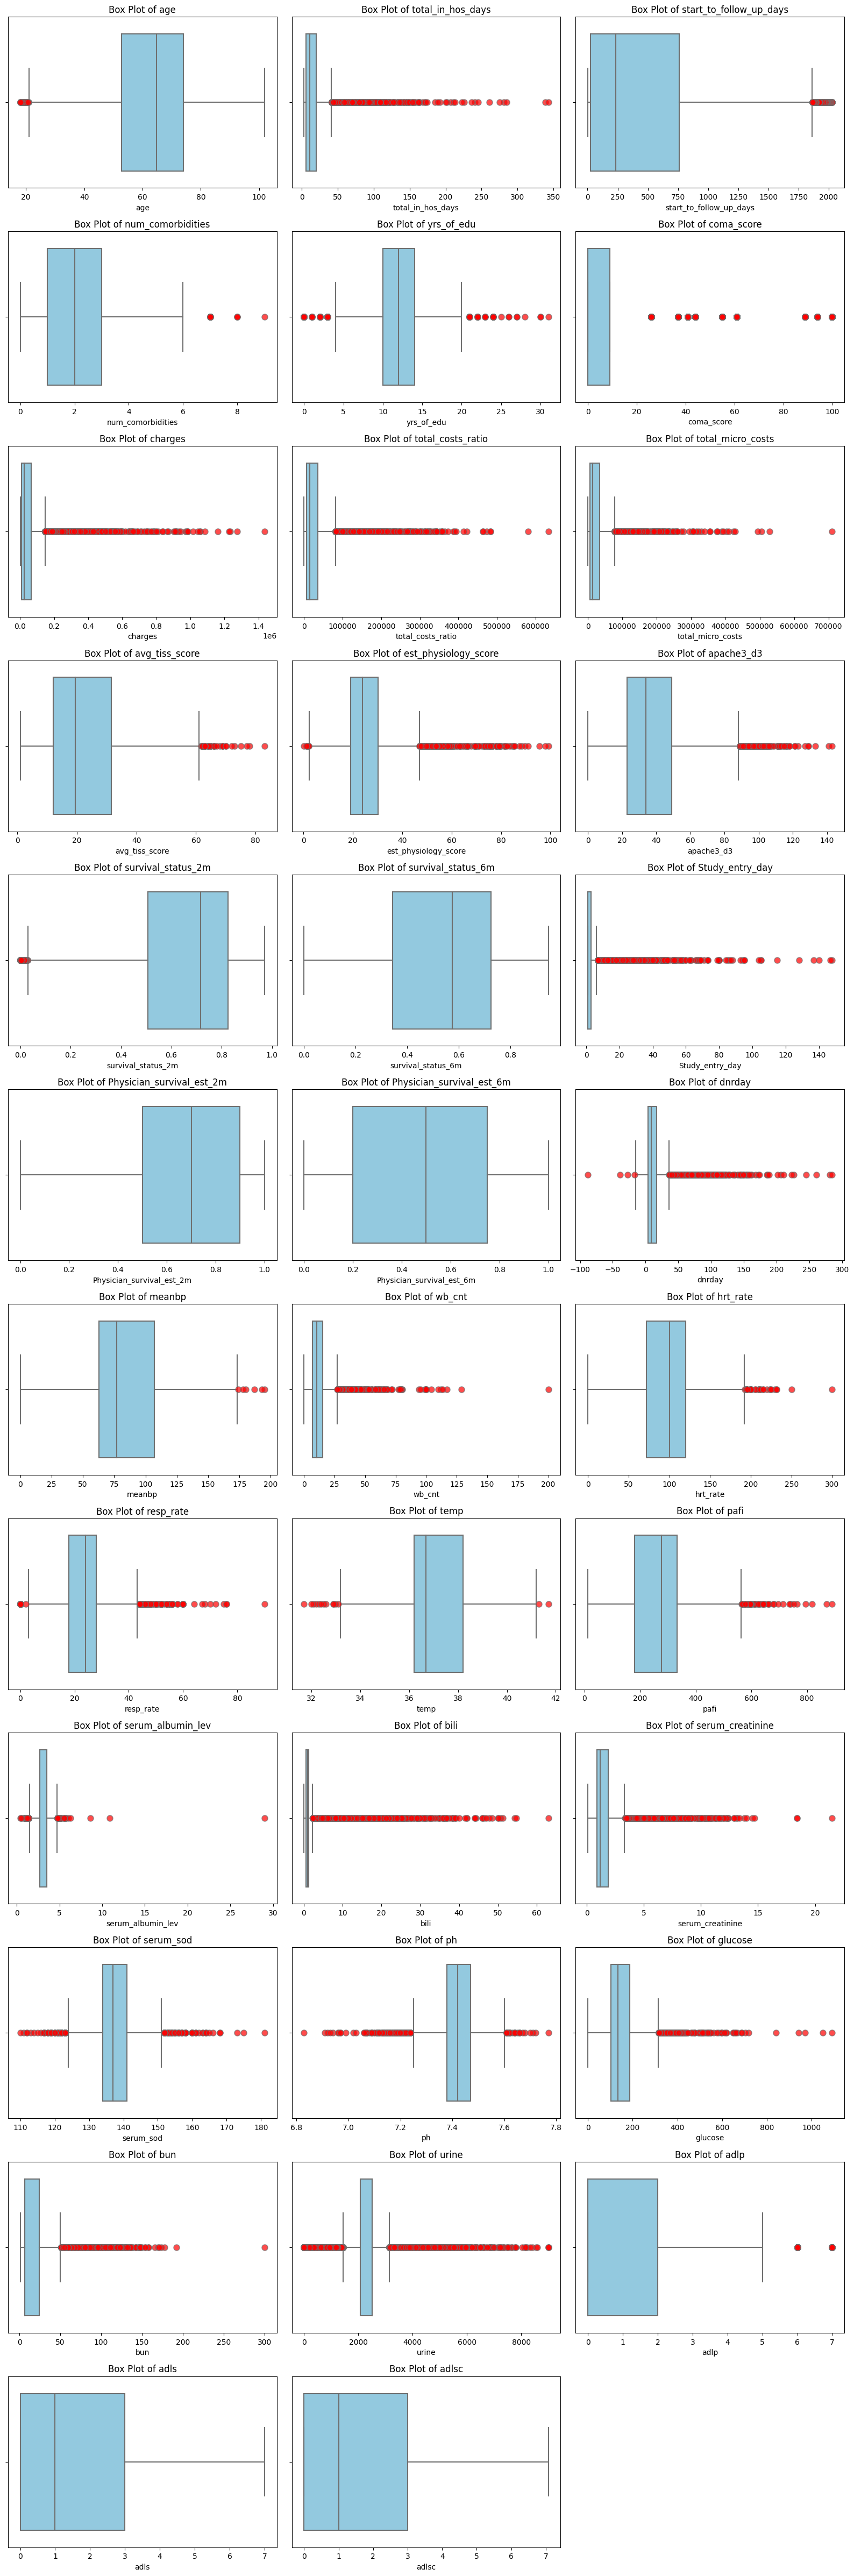

In [19]:
# Select continuous columns
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = -(-len(continuous_columns) // num_cols)  # Ceiling division

# Set figure size
plt.figure(figsize=(16, 4 * num_rows))

# Initialize a dictionary to store the properties of the outliers
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none', alpha=0.7)

# Iterate through each continuous column and create a box plot
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], color='skyblue', flierprops=flierprops)
    plt.title(f'Box Plot of {column}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In the above plots, the outliers are marked in red. However, the outliers are not handled or removed as they could be special cases.  Moreover, as it is a medical dataset,  manipulation of the data columns is not advised as they are "value not provided".  Further in the EDA, if required then outliers will be removed or set as "value not provided" for the analysis and inferences.


### Data Transformation

In [20]:
df['age'] = df['age'].round().astype('int') # Converting age to int
df = df.round(2) # Rounding all the continuous values to 2 decimal points

#**PART 2: EDA**

## Descriptive Statistics

In [21]:
df.describe() # Statistics of numerical features

age  total_in_hos_days  start_to_follow_up_days  \
count  9103.000000        9103.000000              9103.000000   
mean     62.654949          17.861474               478.548500   
std      15.597114          22.006187               560.405177   
min      18.000000           3.000000                 3.000000   
25%      53.000000           6.000000                26.000000   
50%      65.000000          11.000000               233.000000   
75%      74.000000          20.000000               761.500000   
max     102.000000         343.000000              2029.000000   

       num_comorbidities   yrs_of_edu   coma_score       charges  \
count        9103.000000  7469.000000  9103.000000  8.932000e+03   
mean            1.868615    11.747088    12.059870  5.999215e+04   
std             1.344555     3.447853    24.637723  1.026539e+05   
min             0.000000     0.000000     0.000000  1.169000e+03   
25%             1.000000    10.000000     0.000000  9.738000e+03   
50%             2.000000    12.000000     0.000000  2.501950e+04   
75%             3.000000    14.000000     9.000000  6.458823e+04   
max             9.000000    31.000000   100.000000  1.435423e+06   

       total_costs_ratio  total_micro_costs  avg_tiss_score  ...         bili  \
count        8217.000000        5630.000000     9022.000000  ...  9103.000000   
mean        30825.867756       28828.878394       22.610544  ...     2.113616   
std         45780.821029       43604.261603       13.233935  ...     4.549465   
min             0.000000        -102.720000        1.000000  ...     0.100000   
25%          5929.570000        5177.407500       12.000000  ...     0.600000   
50%         14452.730000       13223.500000       19.500000  ...     1.010000   
75%         36087.940000       34223.602500       31.670000  ...     1.300000   
max        633212.000000      710682.000000       83.000000  ...    63.000000   

       serum_creatinine    serum_sod           ph      glucose          bun  \
count       9103.000000  9103.000000  6821.000000  4604.000000  9103.000000   
mean           1.765567   137.569043     7.415814   159.851868    19.995827   
std            1.681369     6.029467     0.080534    88.389064    23.264135   
min            0.100000   110.000000     6.830000     0.000000     1.000000   
25%            0.900000   134.000000     7.380000   103.000000     6.510000   
50%            1.200000   137.000000     7.420000   135.000000     6.510000   
75%            1.900000   141.000000     7.470000   188.000000    24.000000   
max           21.500000   181.000000     7.770000  1092.000000   300.000000   

             urine         adlp         adls        adlsc  
count  9103.000000  3464.000000  6236.000000  9103.000000  
mean   2357.220904     1.157910     1.636786     1.887778  
std    1005.431713     1.739672     2.230586     2.003323  
min       0.000000     0.000000     0.000000     0.000000  
25%    2075.000000     0.000000     0.000000     0.000000  
50%    2502.000000     0.000000     1.000000     1.000000  
75%    2502.000000     2.000000     3.000000     3.000000  
max    9000.000000     7.000000     7.000000     7.070000  

[8 rows x 35 columns]

In [22]:
df.describe(include = 'object') # Statistics of categorical features

death   sex  hospdead disease_sub_category disease_category  \
count    9103  9103      9103                 9103             9103   
unique      2     2         2                    8                4   
top         1  male         0    ARF/MOSF w/Sepsis         ARF/MOSF   
freq     6199  5124      6744                 3513             4225   

                   income   race  diabetes  dementia has_cancer signed_dnr  \
count                9103   9103      9103      9103       9103       9103   
unique                  5      6         2         2          3          4   
top     no info available  white         0         0         no     no dnr   
freq                 2981   7189      7327      8807       5993       5879   

                   sfdm2  
count               9103  
unique                 6  
top     <2 mo. follow-up  
freq                3121

## Histogram for numerical attributes

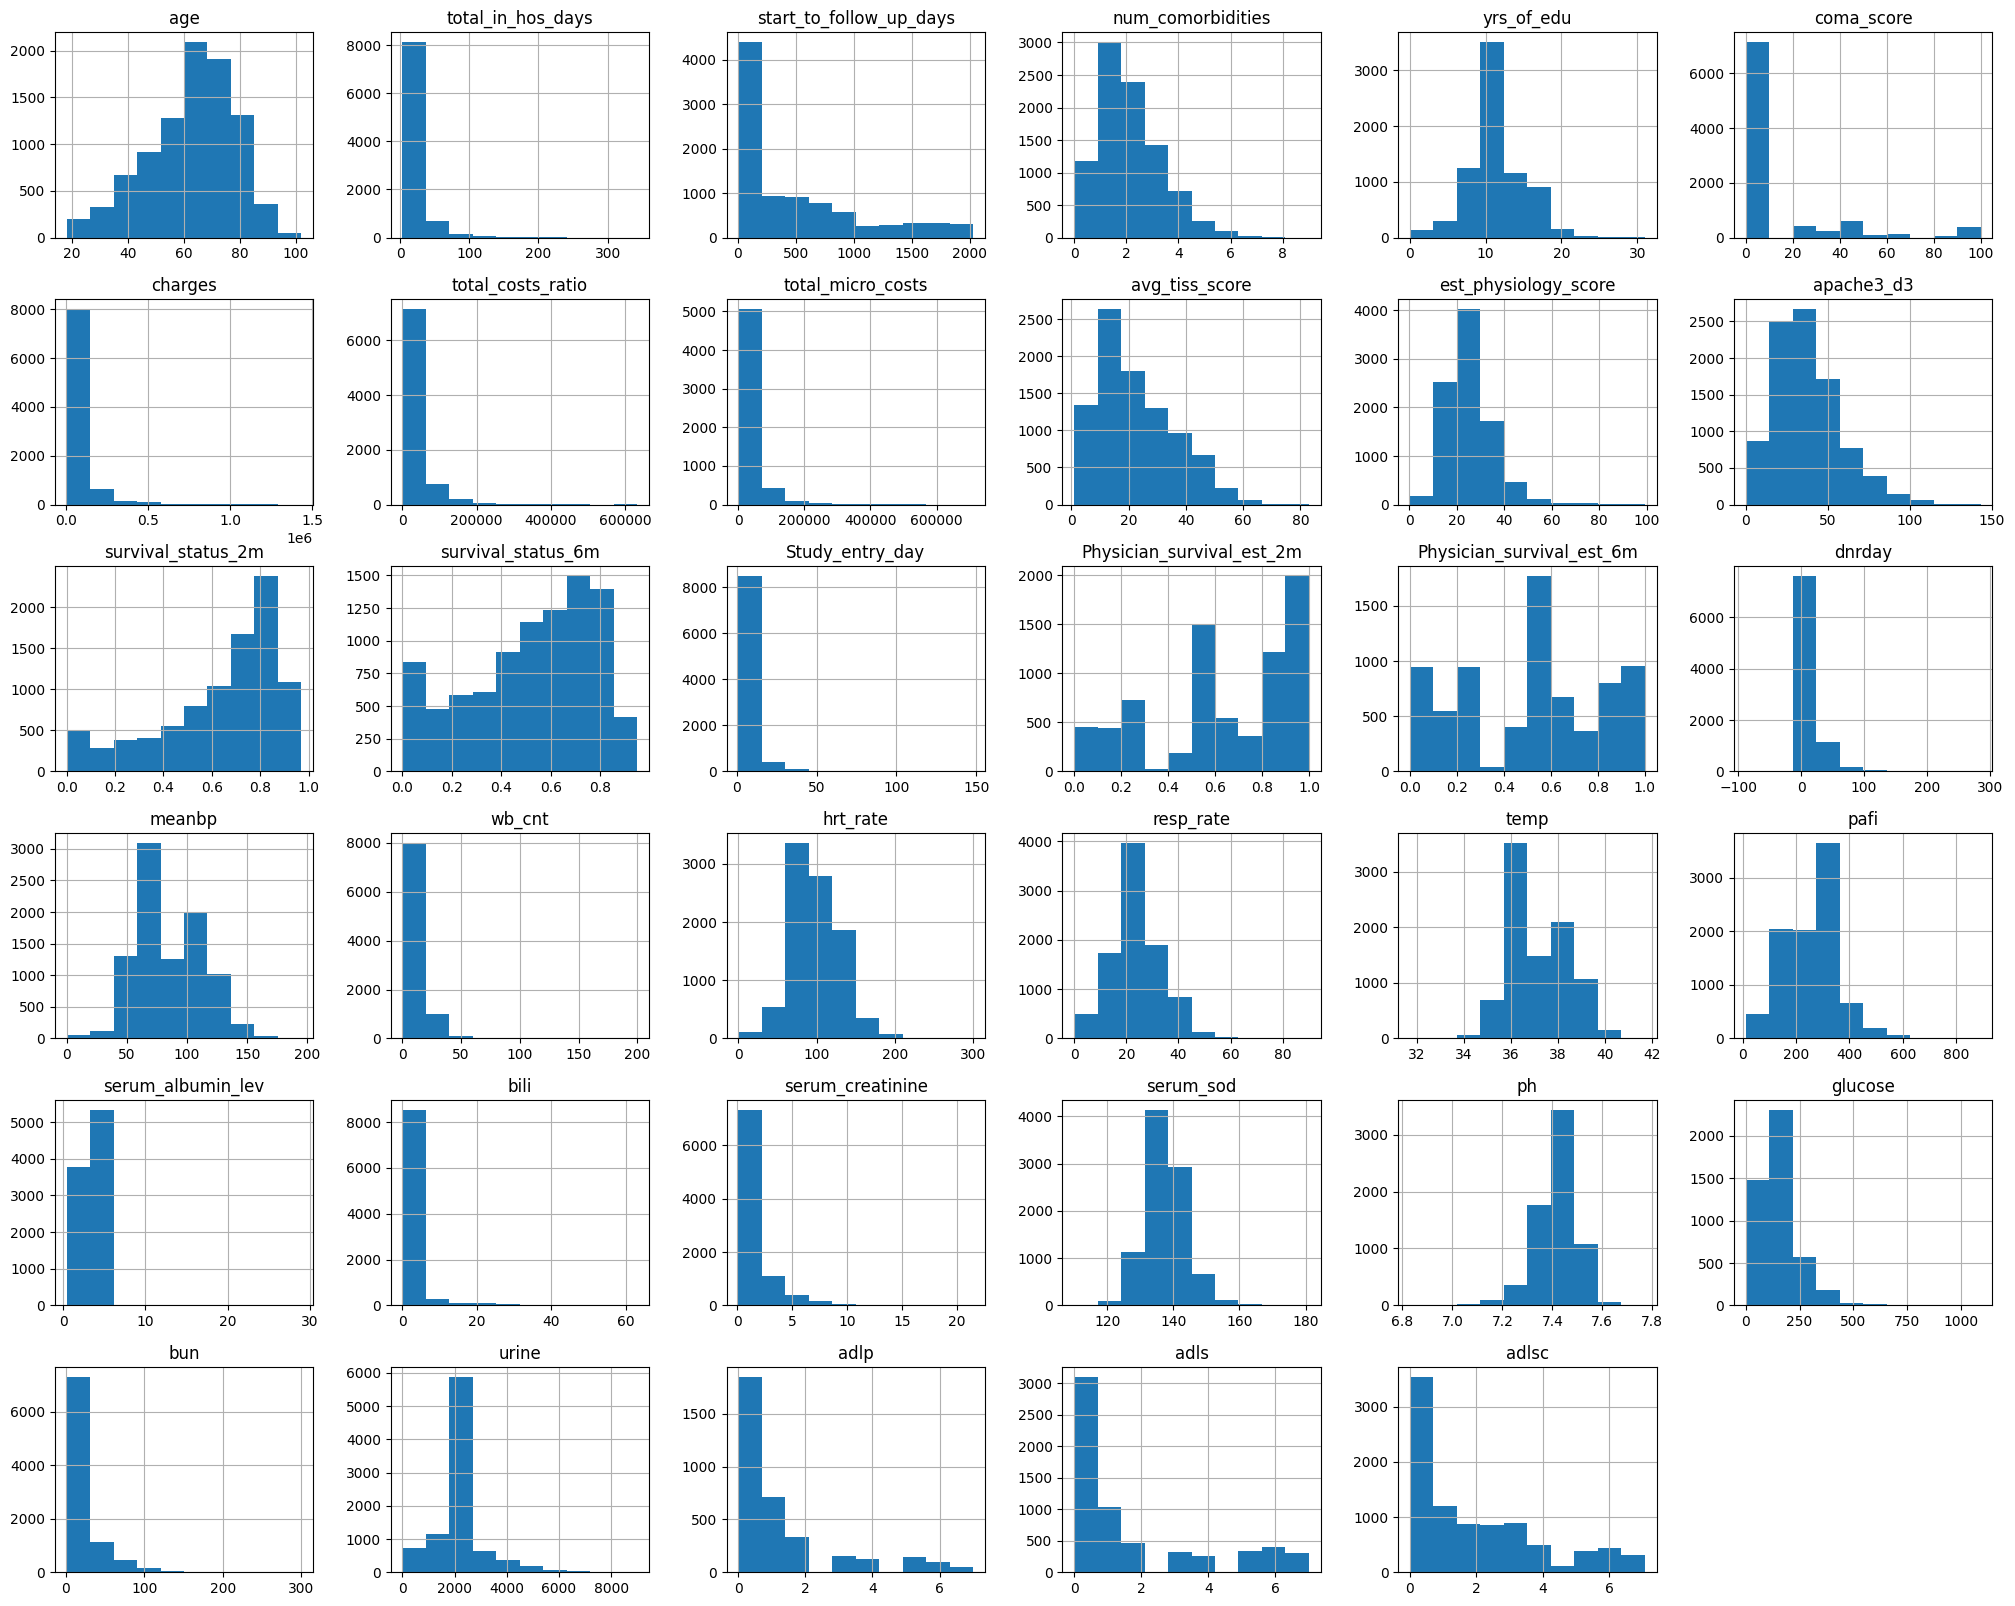

In [23]:
# Histogram for all continuous features

df.select_dtypes(include=['number']).hist(bins=10, figsize=(25, 20))
plt.show()

## Countplot for categorical attributes

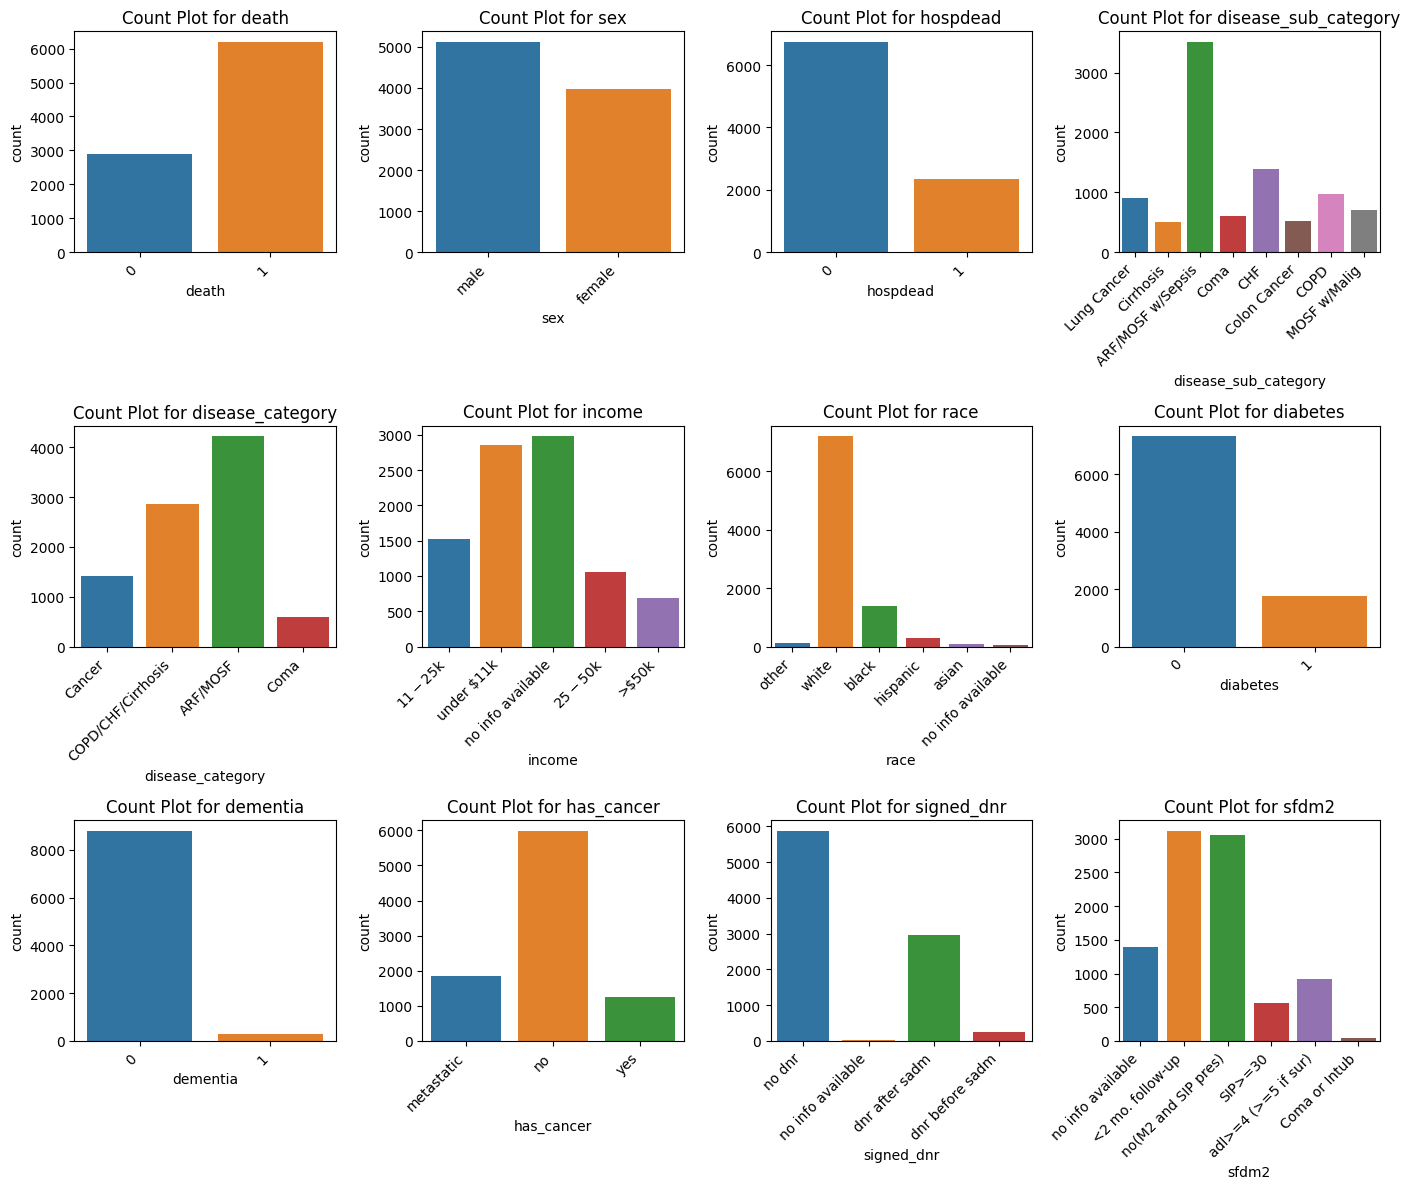

In [24]:
# Get the number of categorical columns
num_columns = len(df.select_dtypes(include=['object']).columns)

# Set the number of columns in subplot grid
num_cols_in_subplot = 4

# Calculate the number of rows needed
num_rows = (num_columns + num_cols_in_subplot - 1) // num_cols_in_subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_in_subplot, figsize=(14, 12))

# Flatten the axes array to handle both 1-row and multi-row subplots
axes = axes.flatten()

# Iterate through categorical columns and create count plots for all categorical features
for i, column in enumerate(df.select_dtypes(include=['object']).columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
    axes[i].set_title(f'Count Plot for {column}')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

## Heatmap for correlation matrix

<ipython-input-25-875aacba58fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


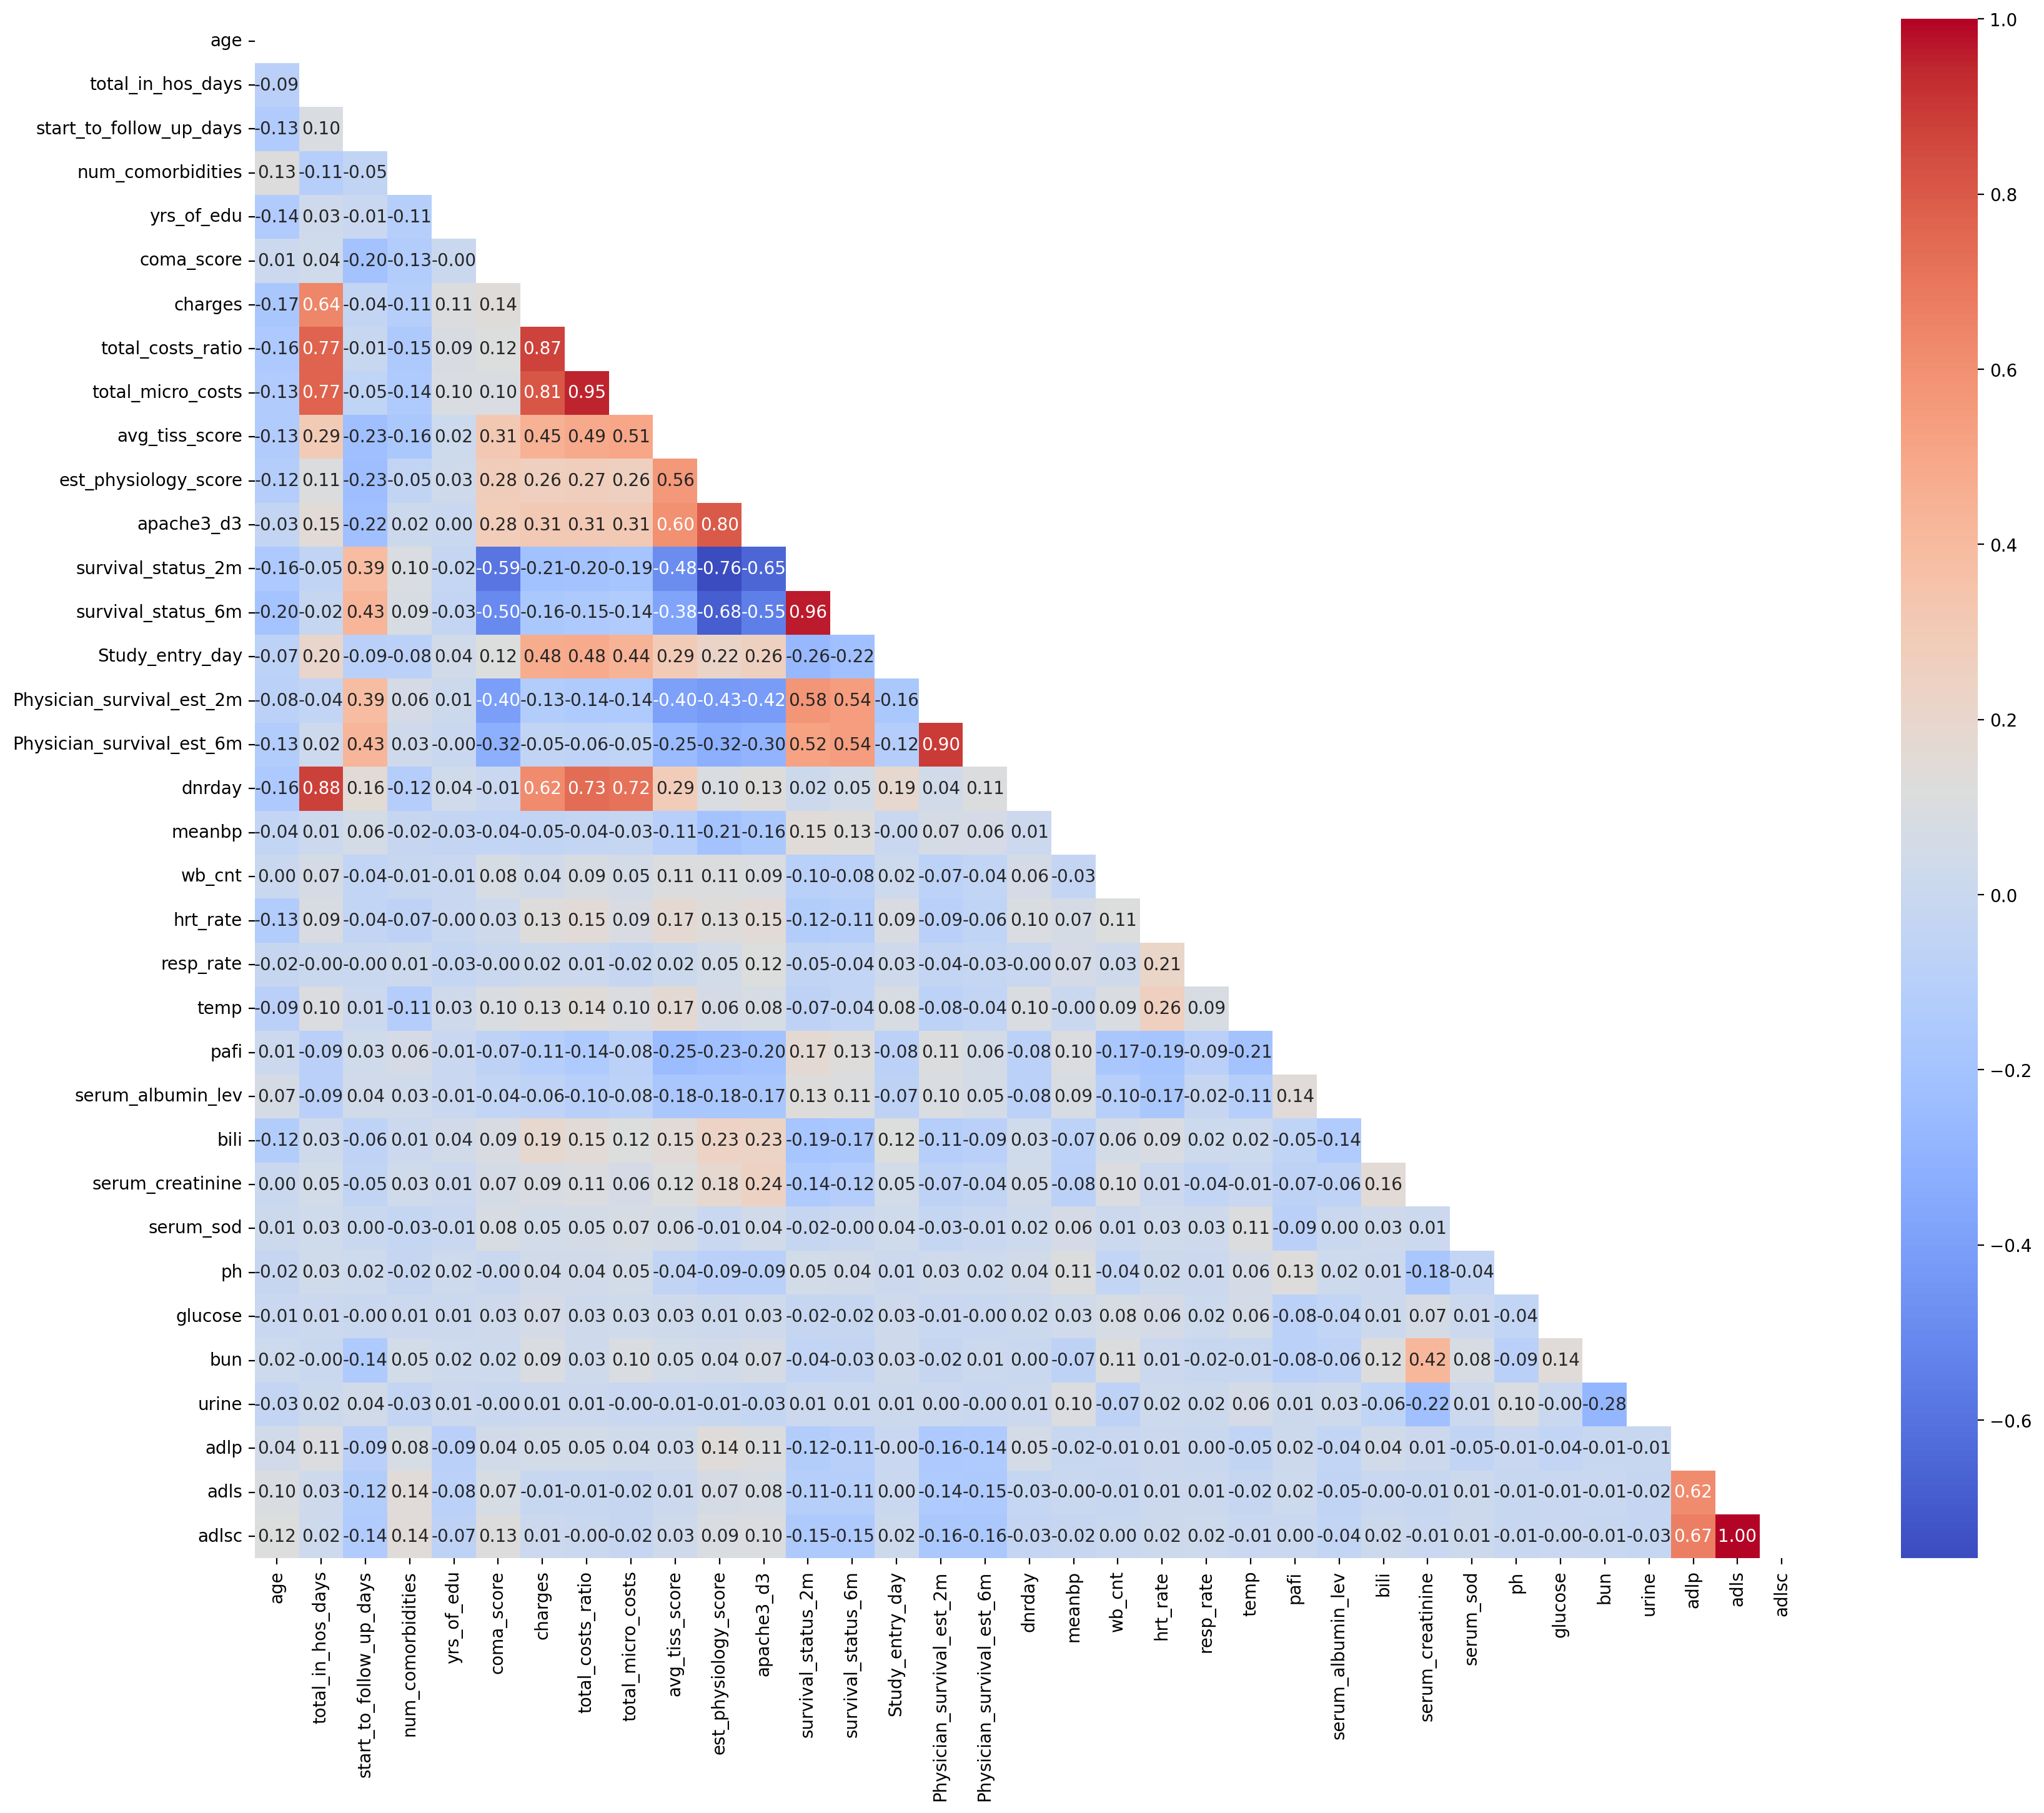

In [25]:
correlation_matrix = df.corr()

# Set the figure size using plt.figure before creating the heatmap
plt.figure(figsize=(20, 16), dpi=200)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",mask=mask)

# Show the plot
plt.show()


## Basic Plots / Correlation / Association



### 1. Correlation between serum_creatinine and BUN(Blood Urea Nitrogen levels):

<ipython-input-26-48fc5baa9cc3>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='bun', y='serum_creatinine', data=df,


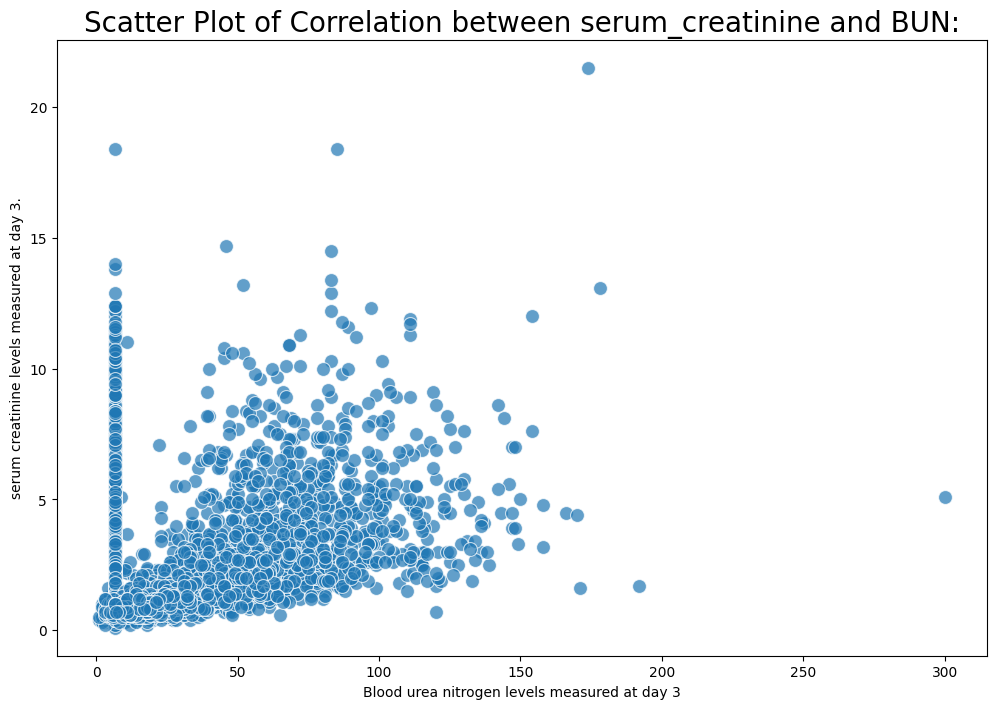

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='bun', y='serum_creatinine', data=df,
                palette='muted', s=100, alpha=0.7)

plt.title('Scatter Plot of Correlation between serum_creatinine and BUN:', fontsize=20)
plt.xlabel('Blood urea nitrogen levels measured at day 3')
plt.ylabel('serum creatinine levels measured at day 3.')
plt.show()

In [27]:
bun_values = df['bun']
crea_values = df['serum_creatinine']

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(bun_values, crea_values)

# Print the results
print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is significant evidence of a correlation.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence of a correlation.")


Pearson correlation coefficient: 0.42159883843864476
p-value: 0.0
Reject the null hypothesis. There is significant evidence of a correlation.


In [28]:
slope, intercept, r_value, p_value, std_err = linregress(bun_values, crea_values)

r_value

0.42159883843864515

#### INFERENCE:
- There is a moderate positive linear correlation between the two variables of  BUN and SCr. This means that as BUN levels increase, SCr levels also tend to increase. This is because both BUN and SCr are measures of waste products in the blood that are produced by the breakdown of protein.<br>

- BUN and SCr are important tools for diagnosing kidney disease. High levels of BUN and SCr can be a sign of kidney damage, and they can also be used to monitor the progression of kidney disease over time.

Null Hypothesis (H0): There is no correlation between 'bun' and 'serum_creatinine' in the population.
Alternative Hypothesis (H1): There is a correlation between 'bun' and 'serum_creatinine' in the population.
Since the p-value is 0, you would reject the null hypothesis in favor of the alternative hypothesis. Therefore, you have strong evidence to suggest that there is a statistically significant correlation between 'bun' and 'serum_creatinine'.

- In practical terms, this means that the observed correlation in this sample is highly unlikely to be due to random chance, and there is support for the existence of a true correlation in the population. The strength of the correlation is moderate, as indicated by the correlation coefficient of 0.42.




---



### 2.  Is there an association of PAFI values with mortality? Is there any association  in patients having respiratory diseases.

In [29]:
class_counts = df['death'].value_counts()
print(class_counts)

1    6199
0    2904
Name: death, dtype: int64


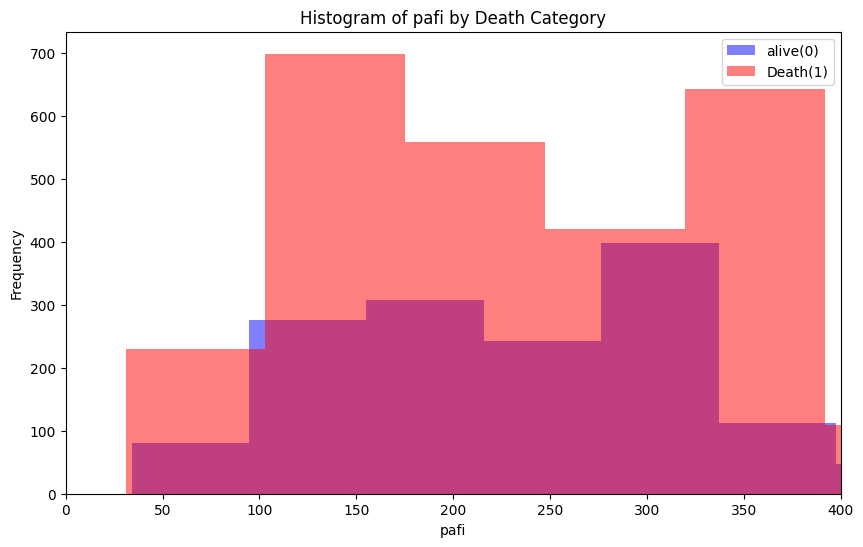

In [30]:
df_filtered = df[df['disease_category'] == 'ARF/MOSF']
pafi_death = df_filtered[['pafi', 'death']]

# Separate the two groups
pafi_alive = pafi_death[pafi_death['death'] == 0]['pafi']
pafi_dead = pafi_death[pafi_death['death'] == 1]['pafi']

# Plot side-by-side histograms
plt.figure(figsize=(10, 6))

plt.hist(pafi_alive, bins=10, alpha=0.5, label='alive(0)', color='blue')
plt.hist(pafi_dead, bins=10, alpha=0.5, label='Death(1)', color='red')
plt.xlim(0,400)

plt.title('Histogram of pafi by Death Category')
plt.xlabel('pafi')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [31]:
# Assuming df is your dataframe containing 'pafi' and 'death' columns
correlation_coefficient, p_value = pearsonr(df['pafi'], df['death'])

# Print the results
print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: 0.02219100472303009
p-value: 0.03424238716790364


#### INFERENCE:

PaO2/FiO2 ratio is the ratio of arterial oxygen partial pressure (PaO2 in mmHg) to fractional inspired oxygen (FiO2 expressed as a fraction, not a percentage).
The correlation between PAFI (Pulmonary Arterial Flow Index)  values and the likelihood of death(Mortality) can be found by the Person's Chi Test and also by visualizing the data by separating it into two groups based on the 'death' category (alive or dead) and created side-by-side histograms to visualize the distribution of PAFI values for each group.

As the p-value is less than the significance level of 0.05,  the null hypothesis is rejected. Hence, there is a significant correlation between PAFI values and the death rate in patients having respiratory diseases.



```
ARDS Severity 	   PaO2/FiO2     Mortality
Mild	             200 – 300	   27%
Moderate	         100 – 200	   32%
Severe	            < 100	       45%
```

In summary, there is an association between PAFI values and mortality, and the results of the statistical test and visualtization provide evidence regarding the presence in patients having respiratory diseases.



---



### 3. Data distribution visualization of glucose levels using histograms/boxplot across ages with and without diabeties

In [32]:
class_counts = df['diabetes'].value_counts()
print(class_counts)

#this shows that the data is not normally distributed hence more cases of not diabetes are recorded.

0    7327
1    1776
Name: diabetes, dtype: int64


This visualization allows you to observe the trend of the number of deaths with increasing glucose levels however due to the higher number of alive cases this is not a reliable visualization.

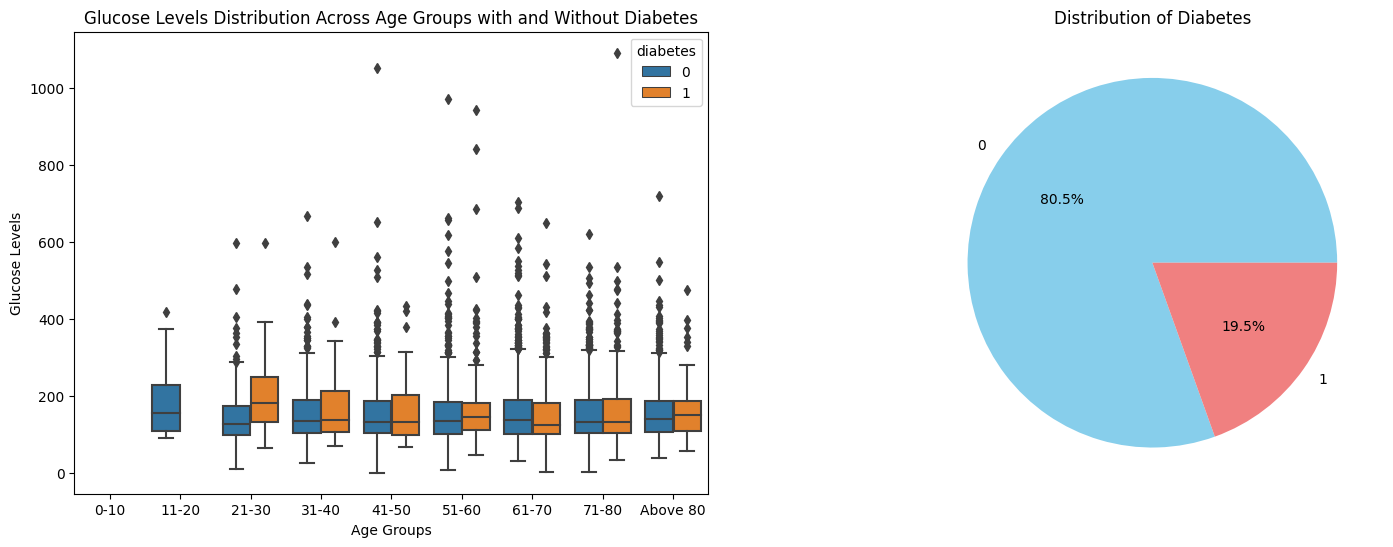

In [33]:
# Create age groups col in df
df['age_group'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', 'Above 80'])

# Set up subplot grid
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# boxplot
sns.boxplot(data=df, x='age_group', y='glucose', hue='diabetes', ax=ax1)
ax1.set_title('Glucose Levels Distribution Across Age Groups with and Without Diabetes')
ax1.set_xlabel('Age Groups')
ax1.set_ylabel('Glucose Levels')

# pie plot
diabetes_counts = df['diabetes'].value_counts()
ax2.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
ax2.set_title('Distribution of Diabetes')
plt.show()

#### INFERENCE:

- The patients with diabetes have higher range of values and median of glucose values compared to patients with no diabetes.
-  As the age group increases this difference in median is decreasing which suggests the are other factors that affect diabetes in older goups >60 years.
- In general, patients with diabetes have higher glucose levels, that is, their IQR range are higher comparatively.






---



### 4. Distribution of Average TISS Score Across Disease Subcategories

 Therapeutic Intervention Scoring System (TISS) is a method for calculating costs in the intensive care unit (ICU) and intermediate care unit (IMCU).<br>

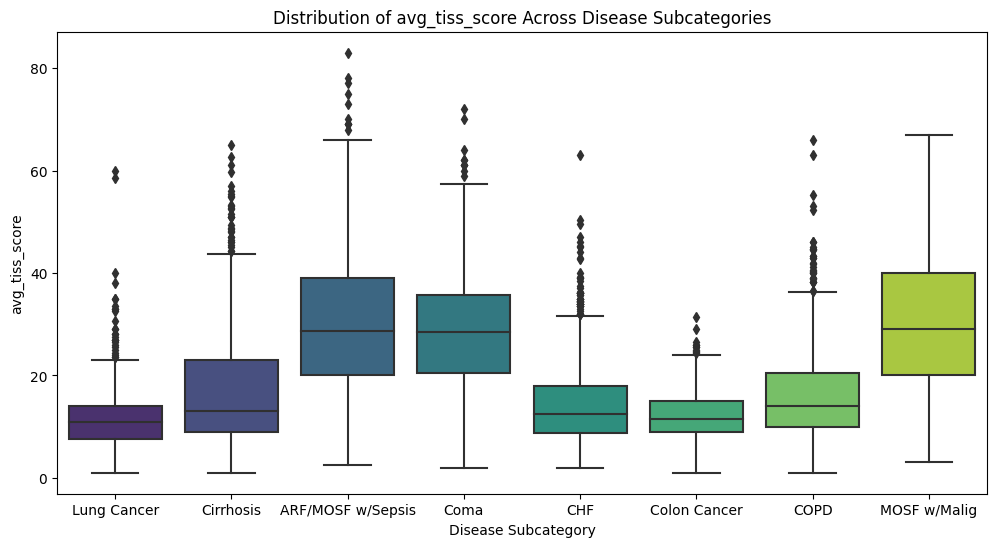

In [34]:
plt.figure(figsize=(12, 6))

# boxplot
sns.boxplot(data=df, x='disease_sub_category', y='avg_tiss_score', palette='viridis')


plt.title('Distribution of avg_tiss_score Across Disease Subcategories')
plt.xlabel('Disease Subcategory')
plt.ylabel('avg_tiss_score')
plt.show()

#### INFERENCE:

- From the above graphs, the Avergae TISS score of Cancer: lung and colon has low values which show that the costs in the intensive care unit (ICU) and intermediate care unit (IMCU) are lower for such patients
- High Tiss score shows more costs are incured by patients suffering from ARF/MOSF w/Sepsis, Coma and MOSF w/Malig.







### 5. Deviation of predicted physician's survival score vs actual survival score for both 2 and 6 months

In [35]:
df_subset = df[['survival_status_2m','Physician_survival_est_2m','survival_status_6m','Physician_survival_est_6m','death']]

In [36]:
df_subset

survival_status_2m  Physician_survival_est_2m  survival_status_6m  \
0                   0.26                       0.50                0.04   
1                   0.00                       0.00                0.00   
2                   0.79                       0.75                0.66   
3                   0.70                       0.90                0.41   
4                   0.63                       0.90                0.53   
...                  ...                        ...                 ...   
9100                0.85                       0.80                0.80   
9101                0.55                       0.50                0.49   
9102                0.74                       0.90                0.66   
9103                0.18                       0.09                0.09   
9104                0.83                        NaN                0.78   

      Physician_survival_est_6m death  
0                          0.25     0  
1                          0.00     1  
2                          0.50     1  
3                          0.50     1  
4                          0.90     0  
...                         ...   ...  
9100                       0.51     0  
9101                       0.50     0  
9102                       0.80     0  
9103                       0.09     1  
9104                        NaN     1  

[9103 rows x 5 columns]

In [37]:
df_subset.describe()

survival_status_2m  Physician_survival_est_2m  survival_status_6m  \
count         9103.000000                7455.000000         9103.000000   
mean             0.635373                   0.618744            0.519645   
std              0.248217                   0.298380            0.253369   
min              0.000000                   0.000000            0.000000   
25%              0.510000                   0.500000            0.340000   
50%              0.720000                   0.700000            0.570000   
75%              0.830000                   0.900000            0.730000   
max              0.970000                   1.000000            0.950000   

       Physician_survival_est_6m  
count                7471.000000  
mean                    0.499596  
std                     0.304426  
min                     0.000000  
25%                     0.200000  
50%                     0.500000  
75%                     0.750000  
max                     1.000000

In [38]:
print("Missing values in each column:\n{}".format(df_subset.isnull().sum()))

Missing values in each column:
survival_status_2m              0
Physician_survival_est_2m    1648
survival_status_6m              0
Physician_survival_est_6m    1632
death                           0
dtype: int64


In [39]:
df_subset.dropna(axis=0, inplace=True)

In [40]:
print("Missing values in each column:\n{}".format(df_subset.isnull().sum()))

Missing values in each column:
survival_status_2m           0
Physician_survival_est_2m    0
survival_status_6m           0
Physician_survival_est_6m    0
death                        0
dtype: int64


In [41]:
df_subset.describe()

survival_status_2m  Physician_survival_est_2m  survival_status_6m  \
count         7455.000000                7455.000000         7455.000000   
mean             0.640021                   0.618744            0.524122   
std              0.241372                   0.298380            0.248954   
min              0.000000                   0.000000            0.000000   
25%              0.520000                   0.500000            0.350000   
50%              0.720000                   0.700000            0.580000   
75%              0.820000                   0.900000            0.720000   
max              0.960000                   1.000000            0.940000   

       Physician_survival_est_6m  
count                7455.000000  
mean                    0.499630  
std                     0.304488  
min                     0.000000  
25%                     0.200000  
50%                     0.500000  
75%                     0.750000  
max                     1.000000

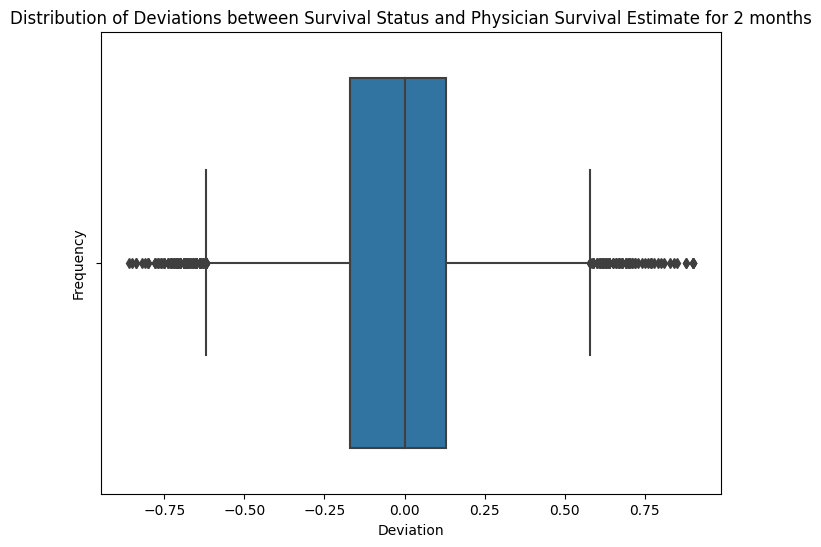

In [42]:
# Create a box plot of the deviations
df_subset['Deviation_2m']= df_subset['Physician_survival_est_2m']- df_subset['survival_status_2m']
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_subset, x='Deviation_2m')

# Add labels and title
plt.xlabel('Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Deviations between Survival Status and Physician Survival Estimate for 2 months')

# Show the plot
plt.show()

In [43]:
# Create a box plot of the deviations
df_subset['Deviation_6m']= df_subset['Physician_survival_est_6m']- df_subset['survival_status_6m']
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_subset, x='Deviation_6m')

# Add labels and title
plt.xlabel('Deviation6')
plt.ylabel('Frequency')
plt.title('Distribution of Deviations between Survival Status and Physician Survival Estimate for 6 months')

# Show the plot
plt.show()

In [44]:
plt.figure(figsize=(12, 8))
# Calculate deviations for 2-month predictions
deviation_2m =df_subset['Physician_survival_est_2m']- df_subset['survival_status_2m']

# Calculate deviations for 6-month predictions
deviation_6m = df_subset['Physician_survival_est_6m']- df_subset['survival_status_6m']
# Kernel density plot for 2-month deviations
sns.kdeplot(deviation_2m, label='Deviation (2-Month)', color='blue')

# Kernel density plot for 6-month deviations
sns.kdeplot(deviation_6m, label='Deviation (6-Month)', color='orange')

# Set labels and title
plt.xlabel('Survival Outcome Deviation')
plt.ylabel('Density')
plt.title('Kernel Density Plot: Predicted vs Actual Survival Deviation')

# Add legend
plt.legend()

# Show the plot
plt.show()

#### INFERENCE:

The Kernel Density Plot and box plots show the deviation of Physician estimated survival values and Support Model's survival predicted values for the patients for 2 months and 6 months.<br>
- The visualizations support the statistical description that 2 month survival estimated values have the standard deviation of 0.25 while for 6 months there standard deviation is 0.27. Hence, slight higher deviation of physician and model rates in 6 month estimated.
- The IQR of the deviation between Physician estimated survival values and Support Model's survival predicted values for 2 months is 0.55 while for 6 months is 0.30.




----


### 6. Hospital Charges Across Disease Categories

In [45]:
# Create a function to format charges as currency
def currency_formatter(x, pos):
    return '${:,.0f}'.format(x)

# Create a subset DataFrame with relevant columns
charges_dz_df = df[['disease_sub_category', 'charges']]

# Set the figure size
plt.figure(figsize=(16, 8))

# Create a box plot with swarmplot
ax = sns.boxplot(x='disease_sub_category', y='charges', data=charges_dz_df, order=df['disease_sub_category'].value_counts().index)

# Apply currency formatting to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.title('Box Plot of Hospital Charges Across Disease Categories')
plt.xlabel('Disease Category')
plt.ylabel('Hospital Charges')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

#### INFERENCE:

- Each disease sub-category has a unique distribution of charges, suggesting that the nature of the disease and required treatments significantly influences hospital costs.
- Diseases like "ARF/MOSF w/Sepsis", "MOSF w/Malig" and "Coma" exhibit higher variability in hospital charges, suggesting a diverse range of patient conditions and treatments.
- Least charges incurred on patients who suffered from 'Lung Cancer' and 'Colon Cancer'


### 7. Exploring the Influence of Age on Do Not Resuscitate (DNR) Orders

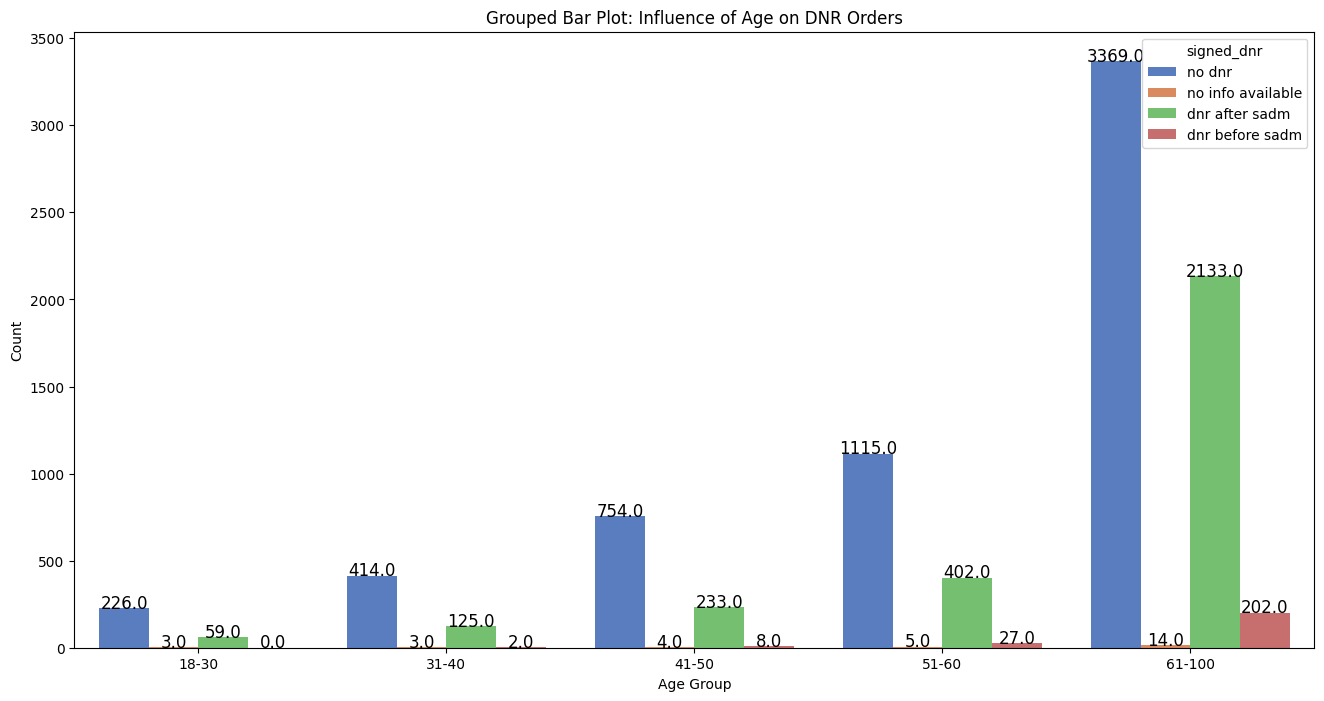

In [46]:
# Create age groups
bins = [18, 30, 40, 50, 60, 100]  # Define your age group bins
labels = ['18-30', '31-40', '41-50', '51-60', '61-100']  # Labels for each age group
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create a subset DataFrame with relevant columns
age_dnr_df = df[['age_group', 'signed_dnr']]

# Set the figure size
plt.figure(figsize=(16, 8))

# Create a grouped bar plot
ax = sns.countplot(x='age_group', hue='signed_dnr', data=age_dnr_df, palette='muted')
plt.title('Grouped Bar Plot: Influence of Age on DNR Orders')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Annotate the plot with patient counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', color='black', size=12)

# Show the plot
plt.show()


In [47]:
# Create age groups
bins = [0, 30, 40, 50, 60, 100]  # Define your age group bins
labels = ['0-30', '31-40', '41-50', '51-60', '61-100']  # Labels for each age group
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create a subset DataFrame with relevant columns
age_dnr_df = df[['age_group', 'signed_dnr']]

# Count the number of DNR orders for each age group
dnr_counts = age_dnr_df.groupby(['age_group', 'signed_dnr']).size().unstack(fill_value=0)

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot a pie chart for each age group
for age_group in labels:
    plt.subplot(2, 3, labels.index(age_group) + 1)
    plt.pie(dnr_counts.loc[age_group], labels=dnr_counts.columns, autopct='%1.1f%%', colors=['skyblue', 'yellow','lightcoral'])
    plt.title(f'DNR Distribution in {age_group} Age Group')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


#### INFERENCE:

- Age Group 0-30: Majority of patients in this age group have a "Do Not Resuscitate" (DNR) order, constituting the lowest percentage among the presented age groups.
- Age Group 31-40: DNR distribution in this age group shows a relatively higher percentage compared to the younger age group, suggesting a potential shift in preferences toward resuscitation.
- Age Group 41-50: The distribution of DNR orders remains consistent with the previous age group, indicating a trend of higher percentages compared to the younger population.
- Age Group 51-60: Similar to the 41-50 age group, the percentage of DNR orders is higher, suggesting that individuals in these age ranges are more likely to have specified DNR preferences.
- Age Group 61-100: The oldest age group shows a notable increase in the percentage of DNR orders, reflecting a higher likelihood of patients in this age range opting for non-resuscitative measures.

### 8. Association between DNR across different disease categories

In [48]:
df1 = df.copy()

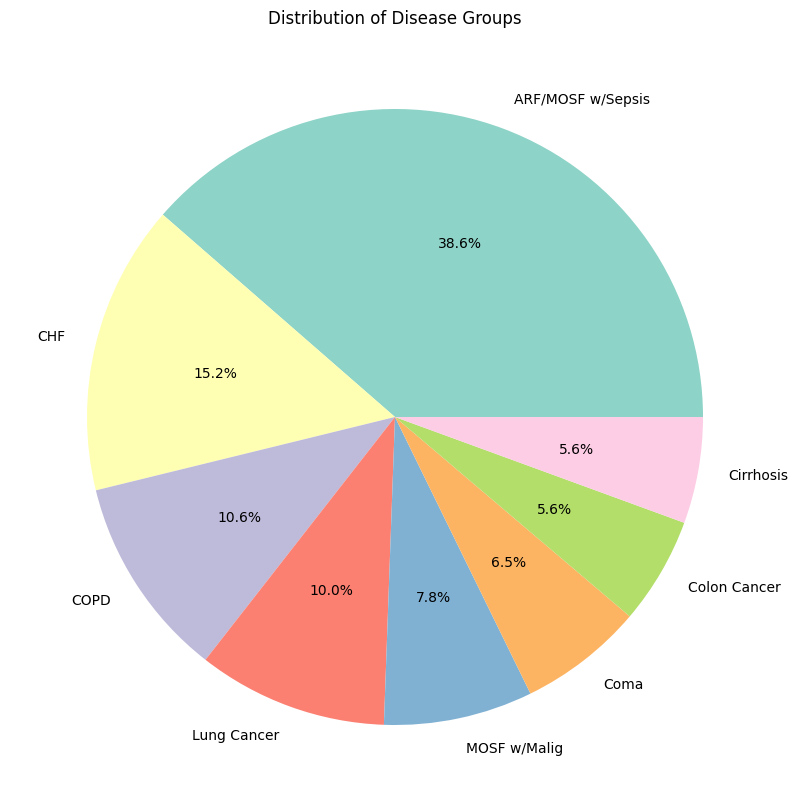

In [49]:
plt.figure(figsize=(10, 10))
plt.pie(df1['disease_sub_category'].value_counts(), labels=df1['disease_sub_category'].value_counts().index, autopct='%.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Disease Groups')
plt.show()

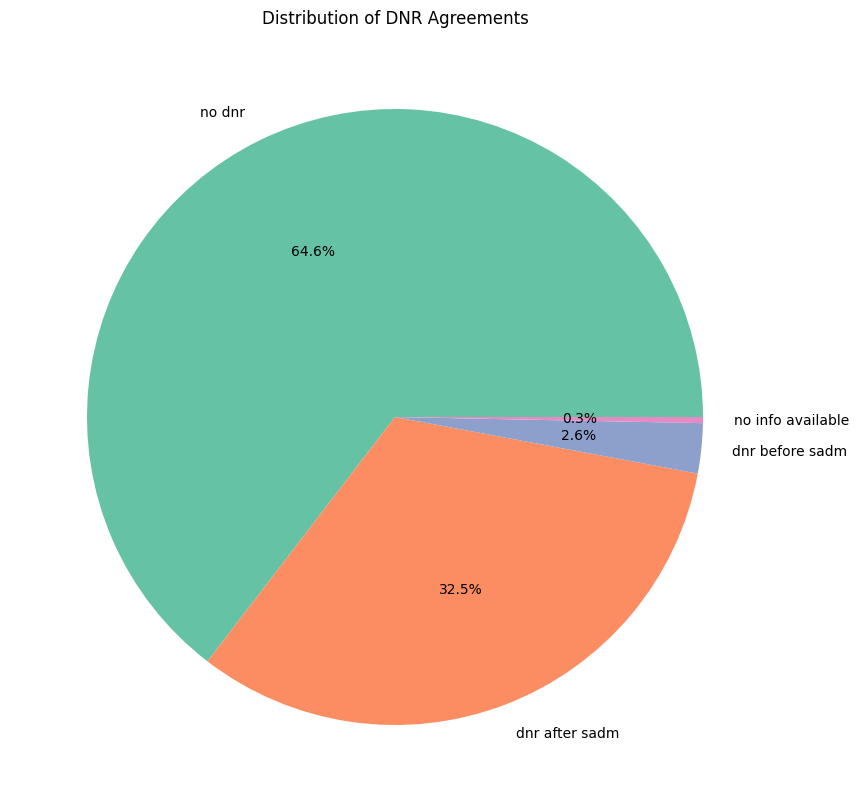

In [50]:
plt.figure(figsize=(10, 10))
plt.pie(df1['signed_dnr'].value_counts(), labels=df1['signed_dnr'].value_counts().index, autopct='%.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of DNR Agreements')
plt.show()

In [51]:
# Create a contingency table
contingency_table = pd.crosstab(df1['disease_sub_category'], df1['signed_dnr'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
signed_dnr            dnr after sadm  dnr before sadm  no dnr  \
disease_sub_category                                            
ARF/MOSF w/Sepsis               1198               62    2242   
CHF                              206               26    1152   
COPD                             273               48     644   
Cirrhosis                        142                5     360   
Colon Cancer                      92                6     413   
Coma                             387               24     183   
Lung Cancer                      271               29     605   
MOSF w/Malig                     387               39     280   

signed_dnr            no info available  
disease_sub_category                     
ARF/MOSF w/Sepsis                    11  
CHF                                   3  
COPD                                  2  
Cirrhosis                             1  
Colon Cancer                          1  
Coma                                

<Axes: xlabel='disease_sub_category'>

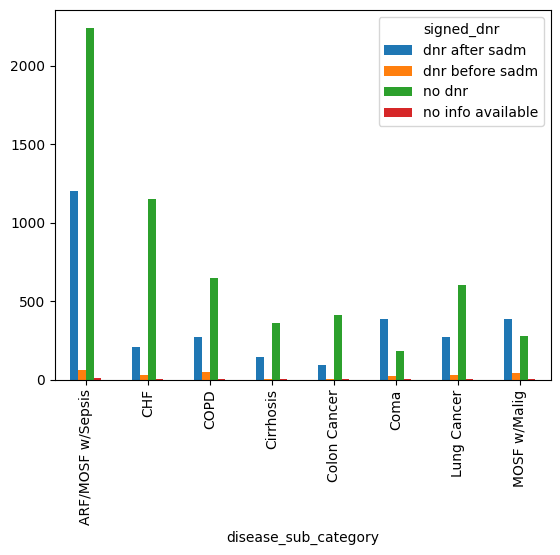

In [52]:
contingency_table.plot.bar()

In [53]:
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Squared Test Results:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")


Chi-Squared Test Results:
Chi-squared statistic: 829.6258843689901
P-value: 4.724167079312816e-162


In [54]:
def cramers_v(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [55]:
cramers_v(df1['disease_sub_category'], df1['signed_dnr']).round(1)

0.2

#### INFERENCE:

- ARF/MOSF with Sepsis has reported highest number of patients followed by congestive heart failure (CHF).

- The distribution of DNR agreements shows that most of the patients haven't signed the DNR.

Chi-squared test is carried out to know whether there exists any association between the disease groups and patients signing DNR.
 - The results shows that the p-value is significantly less than 0.05 which states there exists some association.

To understand more about the asscoiation, cramers_v test is done
- Results depicts that these categories are weakly associated.

### 9. Association between Disease and Age Category

In [56]:
# Reference : https://stackoverflow.com/questions/49382207/how-to-map-numeric-data-into-categories-bins-in-pandas-dataframe

# Create age categories
age_bins = [0, 18, 30, 45, 60, 80, float('inf')]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-80', '80+']

# Apply age categories to the DataFrame
df1['age_category'] = pd.cut(df1['age'], bins=age_bins, labels=age_labels)

In [57]:
# Create a contingency table
contingency_table = pd.crosstab(df1['disease_sub_category'], df1['age_category'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
age_category          0-18  19-30  31-45  46-60  61-80  80+
disease_sub_category                                       
ARF/MOSF w/Sepsis        2    231    530    720   1614  416
CHF                      0     19     97    298    748  225
COPD                     0      2     20    161    631  153
Cirrhosis                0      9    141    194    155    9
Colon Cancer             0      7     46    136    313   10
Coma                     1     22     53    119    298  103
Lung Cancer              0      1     70    314    503   20
MOSF w/Malig             3     32    119    204    322   32


In [58]:
# Plot the contingency table
contingency_table.plot.bar()

<Axes: xlabel='disease_sub_category'>

In [59]:
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Squared Test Results:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")


Chi-Squared Test Results:
Chi-squared statistic: 998.0038717164832
P-value: 7.705857081514128e-187


In [60]:
cramers_v(df1['disease_sub_category'], df1['age_category']).round(1)

0.1

#### INFERENCE:
To check whether there exists some association between age and disease groups, initally ages are grouped. Then Chi-squared test is carried out to check the association.
- The results of chi-squared test shows that the p-value is significantly less than 0.05 which states there exists some association between Diseases and Age groups
.
To understand more about the asscoiation, cramers_v test is done.
- The value is 0.1 suggests there exists very weak association.

- It is also evident from the plot that patients of age between 61 and 80 are more affected by various critical illness.

### 10. Presence of ARDS (Acute Respiratory Distress Syndrome) across different diseases

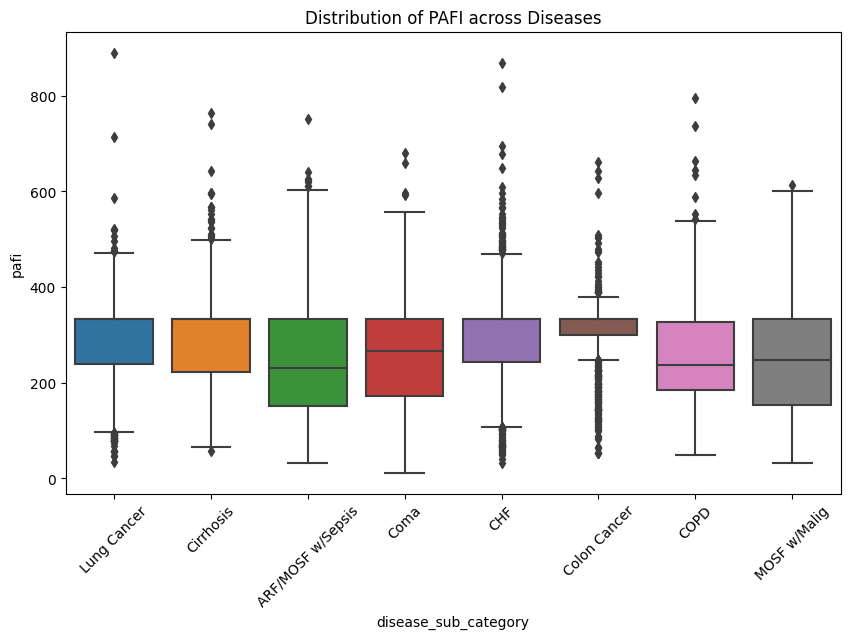

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='disease_sub_category', y='pafi', data=df1)
plt.title('Distribution of PAFI across Diseases')
plt.xticks(rotation = 45)
plt.show()

In [62]:
# Referencee https://litfl.com/pao2-fio2-ratio/

# Create age categories
pafi_bin = [-float('inf'), 100, 200, 300, float('inf')]
pafi_labels = ['Severe', 'Moderate', 'Mild', 'No ARDS']

# Apply age categories to the DataFrame
df1['ARDS'] = pd.cut(df1['pafi'], bins=pafi_bin, labels=pafi_labels)

In [63]:
# Create a contingency table
contingency_table = pd.crosstab(df1['disease_sub_category'], df1['ARDS'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
ARDS                  Severe  Moderate  Mild  No ARDS
disease_sub_category                                 
ARF/MOSF w/Sepsis        261      1234   856     1162
CHF                       32       201   309      845
COPD                      31       295   357      284
Cirrhosis                 14        95   100      299
Colon Cancer              10        61    58      383
Coma                      32       167   147      250
Lung Cancer               35       135   140      598
MOSF w/Malig              60       199   182      271


<Axes: xlabel='disease_sub_category'>

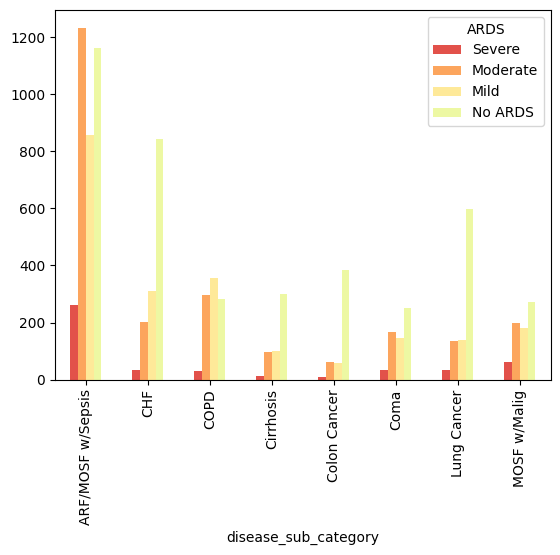

In [64]:
contingency_table.plot.bar(color = sns.color_palette('Spectral'))

#### INFERENCE:

The box plot displays that distribution of PAFI values are more or less similar. To understand more about the PAFI, these values are categorised into 'Severe', 'Moderate', 'Mild' and 'No ARDS' (ARDS -> Acute Respiratory Distress Syndrome)

- PAFI value is usually used to assess the severity of respiratory failure cases and the chart depicts that fact clearly.
- Most of the severe values are present for the ARF/MOSF w/Sepsis disease.
- It is also important to note that, other diseases also show ARDS slightly which might be suggesting that those disease has an impact on the respiratory system.
- COPD (chronic obstructive pulmonary disease) shows a different trend. For this disease, more ARDS cases are reported like ARF/MOSF w/Sepsis disease. On further investigation it became clear that, COPD is a disease that affects lungs.

### 11. SUPPORT Model Efficiency in predicting the survival status

In [65]:
# Filter the records of patients who died to analyse the efficiency
df2 = df1[df1['death']==1]

# Create a new column for categorising 'survival_status_2m' to 'High', 'Moderate', 'Low' chances for survival
df2['survival_chance_2months'] = df2['survival_status_2m'].apply(lambda x: 'High' if x > 0.75 else ('Moderate' if x > 0.5 else 'Low'))

# Create a new column for categorising 'survival_status_6m' to 'High', 'Moderate', 'Low' chances for survival
df2['survival_chance_6months'] = df2['survival_status_6m'].apply(lambda x: 'High' if x > 0.75 else ('Moderate' if x > 0.5 else 'Low'))

# Create a new column indicating whether a patient survived more than 2 months
df2['survived_2_Months'] = (df2['start_to_follow_up_days'] > 60).astype(int)  # Assuming 30 days per month

# Create a new column indicating whether a patient survived more than 6 months
df2['survived_6_Months'] = (df2['start_to_follow_up_days'] > 180).astype(int)  # Assuming 30 days per month

In [66]:
# Set hue order
hue_order = ['Low', 'Moderate', 'High']

# Create a list of unique values in 'disease_sub_category'
disease_categories = df2['disease_sub_category'].unique()

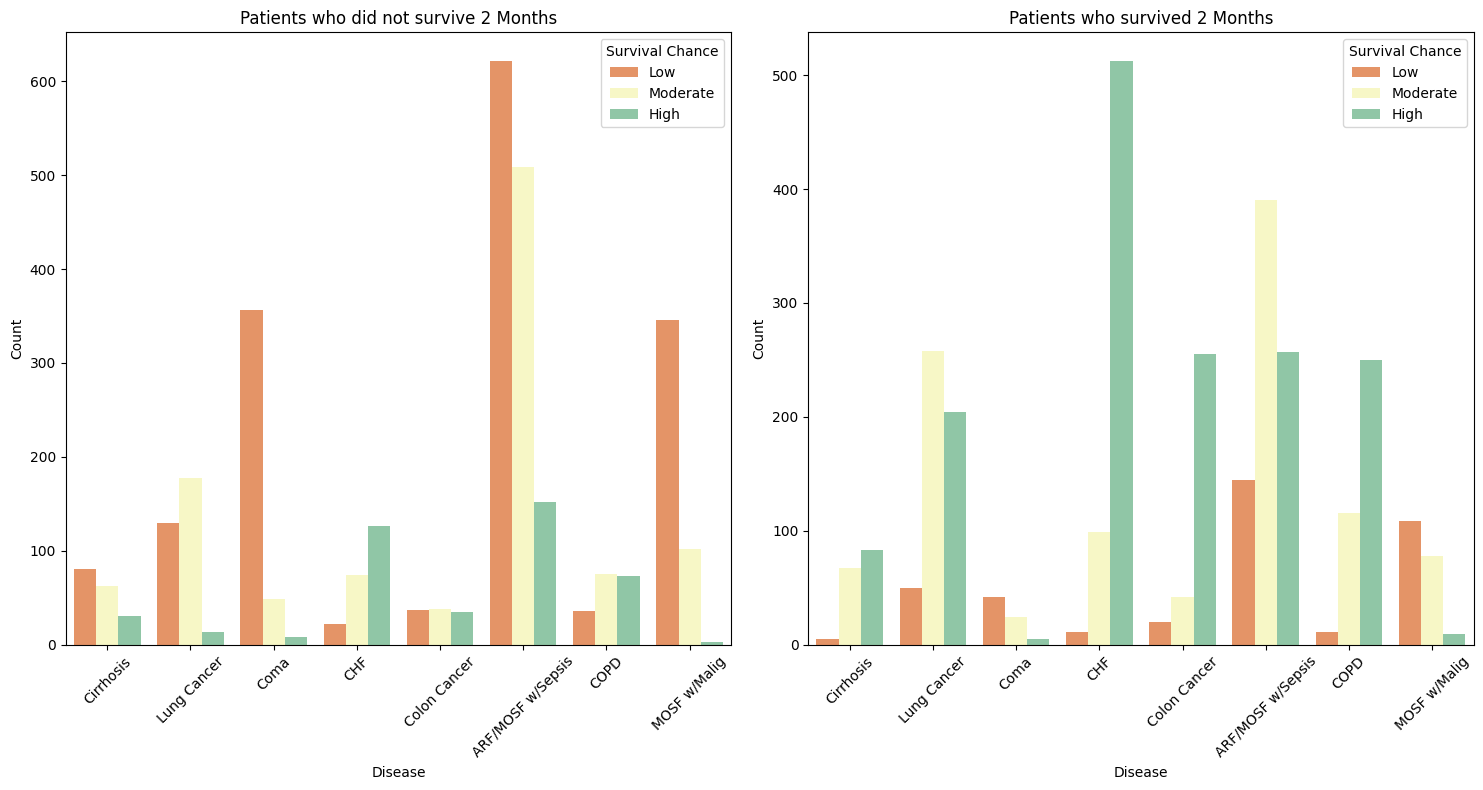

In [67]:
plt.figure(figsize=(15, 8))

# Create two subplots for Survived_2_Months=0 and Survived_2_Months=1
plt.subplot(1, 2, 1)
sns.countplot(
    data=df2[df2['survived_2_Months'] == 0], # Filter data for patients who didn't survive 2 months
    x='disease_sub_category',
    hue='survival_chance_2months',
    palette='Spectral',
    order = disease_categories, # Specify the order in which the categories should appear
    hue_order=hue_order, # Specify the order in which the hue should appear
)
plt.xlabel('Disease')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.legend(title='Survival Chance')
plt.title('Patients who did not survive 2 Months')

plt.subplot(1, 2, 2)
sns.countplot(
    data=df2[df2['survived_2_Months'] == 1], # Filter data for patients who survived 2 months
    x='disease_sub_category',
    hue='survival_chance_2months',
    palette='Spectral',
    order = disease_categories, # Specify the order in which the categories should appear
    hue_order=hue_order, # Specify the order in which the hue should appear
)
plt.xlabel('Disease')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.legend(title='Survival Chance')
plt.title('Patients who survived 2 Months')

plt.tight_layout()
plt.show()

#### INFERENCE a:

- For patients who didn't survive 2 months, the model performed pretty well for almost all the disease.
- For CHF and COPD, the model showcased a poor performance comapred to others.
- While for the patients who survived 2 months, the model worked well for all the disease except Coma and MOSF w/Malig

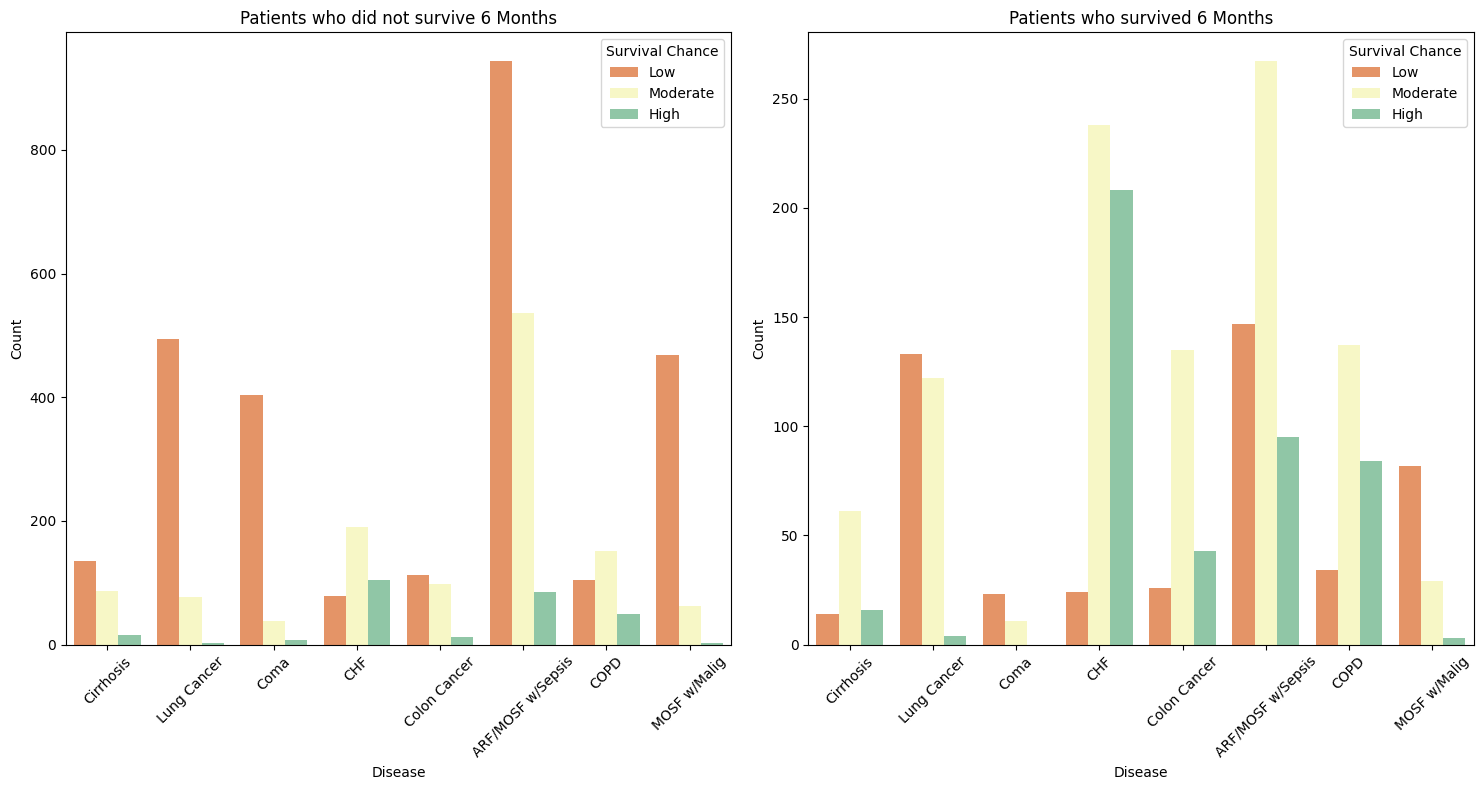

In [68]:
plt.figure(figsize=(15, 8))

# Create two subplots for Survived_6_Months=0 and Survived_6_Months=1
plt.subplot(1, 2, 1)
sns.countplot(
    data=df2[df2['survived_6_Months'] == 0], # Filter data for patients who didn't survive 6 months
    x='disease_sub_category',
    hue='survival_chance_6months',
    palette='Spectral',
    order = disease_categories, # Specify the order in which the categories should appear
    hue_order=hue_order, # Specify the order in which the hue should appear
)
plt.xlabel('Disease')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.legend(title='Survival Chance')
plt.title('Patients who did not survive 6 Months')

plt.subplot(1, 2, 2)
sns.countplot(
    data=df2[df2['survived_6_Months'] == 1], # Filter data for patients who survived 6 months
    x='disease_sub_category',
    hue='survival_chance_6months',
    palette='Spectral',
    order = disease_categories, # Specify the order in which the categories should appear
    hue_order=hue_order, # Specify the order in which the hue should appear
)
plt.xlabel('Disease')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.legend(title='Survival Chance')
plt.title('Patients who survived 6 Months')

plt.tight_layout()
plt.show()

#### INFERENCE b:

- Similarly, for patients who didn't survive 6 months, the model performed pretty well for almost all the disease.
- For CHF and COPD, the model showcased a poor performance comapred to others.
- While for the patients who survived 6 months, the model worked well for all the disease except lung Cancer, Coma and MOSF w/Malig

### 12. Distribution of Cancer Status by Race

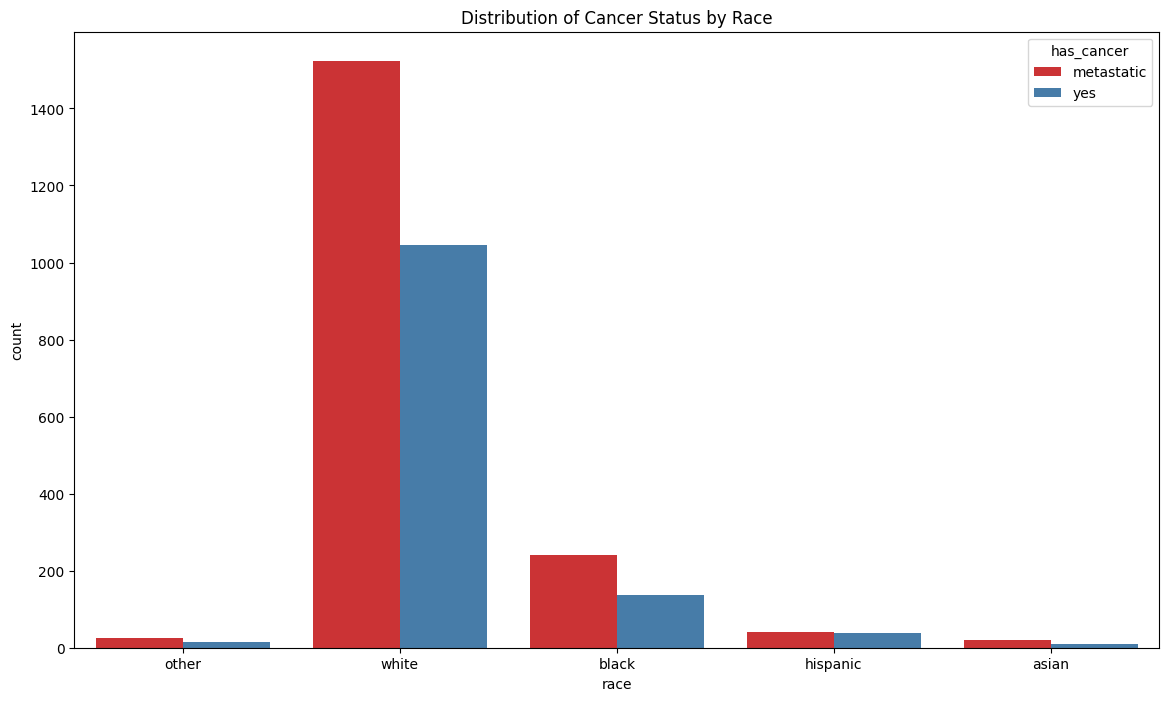

In [69]:
filtered_data = data[data['has_cancer'].isin(['yes', 'metastatic'])]

plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_data, x='race', hue='has_cancer', palette='Set1')
plt.title('Distribution of Cancer Status by Race')
plt.show()


#### INFERENCE:

Malignant tumors are cancerous and have the ability to invade nearby tissues and spread to other parts of the body- (yes cases) while in metastatic cancer, cancer cells can break away from the primary (original) tumor and travel through the blood or lymphatic system to other organs or tissues, forming new tumors. (metastatic cases)

- Assumption: "yes" cases are assumed to be malignant cancer.

- 'White' racial category suffer from metastatic cancer (severe) more than malignant cancers.

- Cancer occurences are lowest in the 'asian' race, compared to other races.



### 13. Distribution of Specific Types of Cancer by Race

In [70]:
grouped_data = data.groupby(['race', 'has_cancer', 'disease_category', 'disease_sub_category']).size().reset_index(name='count')
cancer_data = grouped_data[grouped_data['disease_category'] == 'Cancer']

plt.figure(figsize=(14, 8))
sns.barplot(x='race', y='count', hue='disease_sub_category', data=cancer_data)
plt.title('Distribution of Specific Types of Cancer by Race')
plt.show()


#### INFERENCE:

- A futher breakdown into cancer cases, Lung Cancer and Colon Cancer are most widely occuring ones across all races.
- Lung cancers are more prevalent than Colon Cancers across a majority of races i.e White, Black and Asian.
- The demographics show, that there is some imbalance in the dataset, so we do not have enough evidence to support the hypothesis that cancer cases are more prevalent in the 'white' race.

### 14. Independent T-Test for Diabetes across different medical features

In [71]:
data['diabetes'] = data['diabetes'].astype(int)

stats_data = data[['meanbp', 'wb_cnt', 'hrt_rate', 'resp_rate', 'temp', 'pafi', 'serum_albumin_lev', 'bili', 'serum_creatinine', 'serum_sod', 'ph', 'glucose', 'bun', 'urine']]

t_test_results = {}

for column in stats_data.columns:
    # Drop missing values for each group
    group1 = stats_data[column][data['diabetes'] == 1].dropna()
    group2 = stats_data[column][data['diabetes'] == 0].dropna()

    if not group1.empty and not group2.empty:
        # Perform t-test
        t_stat, p_value = ttest_ind(group1, group2)
        t_test_results[column] = {'t_statistic': t_stat, 'p_value': p_value}
    else:
        t_test_results[column] = {'t_statistic': None, 'p_value': None}

# Display results
for column, result in t_test_results.items():
    print(f"===== Statistical Test for {column} and Diabetes =====")
    print(f"T-statistic: {result['t_statistic']}")
    print(f"P-value: {result['p_value']}")
    print("--------")


===== Statistical Test for meanbp and Diabetes =====
T-statistic: -0.603056863153041
P-value: 0.5464858874357122
--------
===== Statistical Test for wb_cnt and Diabetes =====
T-statistic: 2.322286336936987
P-value: 0.02023998991333739
--------
===== Statistical Test for hrt_rate and Diabetes =====
T-statistic: -5.970482960149102
P-value: 2.454054243115191e-09
--------
===== Statistical Test for resp_rate and Diabetes =====
T-statistic: -3.0836561322499296
P-value: 0.0020508597749683186
--------
===== Statistical Test for temp and Diabetes =====
T-statistic: -1.0668222910107727
P-value: 0.28608038609647424
--------
===== Statistical Test for pafi and Diabetes =====
T-statistic: 2.3851820848999736
P-value: 0.017097985575645222
--------
===== Statistical Test for serum_albumin_lev and Diabetes =====
T-statistic: -1.1951812868802956
P-value: 0.23206566293528344
--------
===== Statistical Test for bili and Diabetes =====
T-statistic: -3.7299071104727983
P-value: 0.00019318085799077626
-----

In [72]:
# Convert t_test_results to a DataFrame
results_df = pd.DataFrame(t_test_results).T.reset_index().rename(columns={'index': 'Variable'})

In [73]:
results_df

Variable  t_statistic       p_value
0              meanbp    -0.603057  5.464859e-01
1              wb_cnt     2.322286  2.023999e-02
2            hrt_rate    -5.970483  2.454054e-09
3           resp_rate    -3.083656  2.050860e-03
4                temp    -1.066822  2.860804e-01
5                pafi     2.385182  1.709799e-02
6   serum_albumin_lev    -1.195181  2.320657e-01
7                bili    -3.729907  1.931809e-04
8    serum_creatinine     5.919080  3.355432e-09
9           serum_sod     1.055658  2.911526e-01
10                 ph    -0.426429  6.698085e-01
11            glucose     1.776006  7.579803e-02
12                bun     1.859029  6.308474e-02
13              urine    -1.372119  1.700988e-01

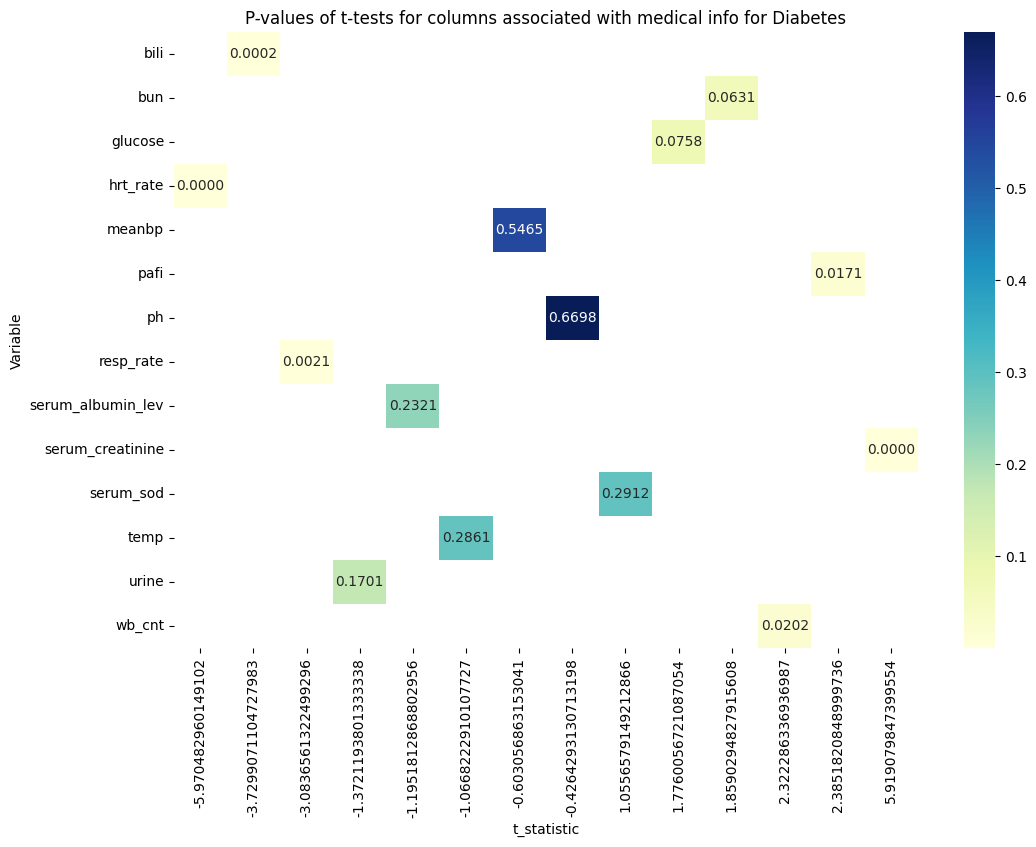

In [74]:
# Drop rows with missing values
results_df_cleaned = results_df.dropna()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(results_df_cleaned.pivot_table(index='Variable', columns='t_statistic', values='p_value'), annot=True, cmap='YlGnBu', fmt=".4f")
plt.title('P-values of t-tests for columns associated with medical info for Diabetes')
plt.show()


#### INFERENCE:

An independent t-test conducted on continuous columns revealed that groups of people with and without diabetes differ significantly for the following variables: heart rate (hrt_rate), respiration rate (resp_rate), bilirubin (bili), PaO2/FiO2 ratio (pafi), white blood cell count (wb_cnt), and serum creatinine (serum_creatinine).
- The hypothesis testing resulted in a p-value < 0.05, indicating a statistically significant difference between the two groups.

### 15. Independent T-Test for Dementia across different medical features

In [75]:
data['dementia'] = data['dementia'].astype(int)

stats_data = data[['meanbp', 'wb_cnt', 'hrt_rate', 'resp_rate', 'temp', 'pafi', 'serum_albumin_lev', 'bili', 'serum_creatinine', 'serum_sod', 'ph', 'glucose', 'bun', 'urine']]

t_test_results = {}

for column in stats_data.columns:
    # Drop missing values for each group
    group1 = stats_data[column][data['dementia'] == 1].dropna()
    group2 = stats_data[column][data['dementia'] == 0].dropna()

    if not group1.empty and not group2.empty:
        # Perform t-test
        t_stat, p_value = ttest_ind(group1, group2)
        t_test_results[column] = {'t_statistic': t_stat, 'p_value': p_value}
    else:
        t_test_results[column] = {'t_statistic': None, 'p_value': None}

# Display results
for column, result in t_test_results.items():
    print(f"===== Statistical Test for {column} and Dementia =====")
    print(f"T-statistic: {result['t_statistic']}")
    print(f"P-value: {result['p_value']}")
    print("--------")


===== Statistical Test for meanbp and Dementia =====
T-statistic: -0.22352267173385776
P-value: 0.8231337562504284
--------
===== Statistical Test for wb_cnt and Dementia =====
T-statistic: 1.138737239324751
P-value: 0.2548434465480239
--------
===== Statistical Test for hrt_rate and Dementia =====
T-statistic: -2.4092974625005157
P-value: 0.01600299171046215
--------
===== Statistical Test for resp_rate and Dementia =====
T-statistic: 0.9025842835865591
P-value: 0.36677045522672524
--------
===== Statistical Test for temp and Dementia =====
T-statistic: -0.3191246909817589
P-value: 0.7496392842918488
--------
===== Statistical Test for pafi and Dementia =====
T-statistic: -0.5357682912721076
P-value: 0.5921362788927265
--------
===== Statistical Test for serum_albumin_lev and Dementia =====
T-statistic: -0.20457112278886894
P-value: 0.8379144833381699
--------
===== Statistical Test for bili and Dementia =====
T-statistic: -3.020348600152903
P-value: 0.002534649806062504
--------
====

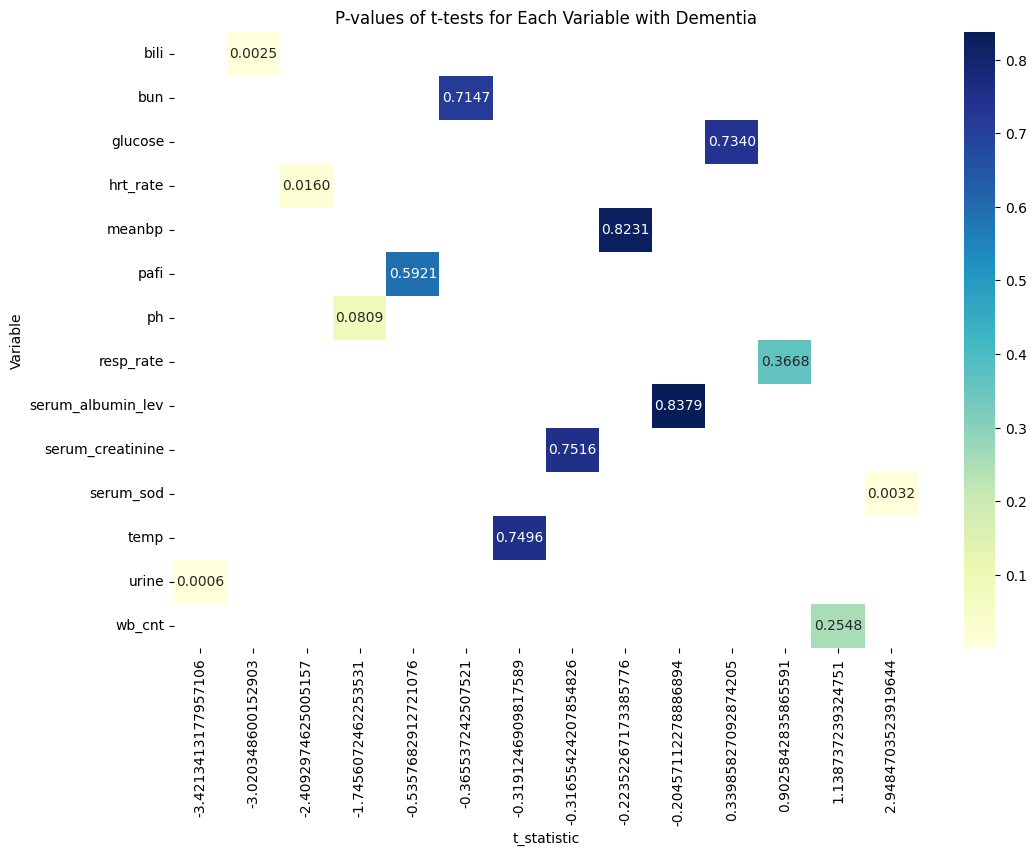

In [76]:
results_df = pd.DataFrame(t_test_results).T.reset_index().rename(columns={'index': 'Variable'})

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.pivot_table(results_df, index='Variable', columns='t_statistic', values='p_value'), annot=True, cmap='YlGnBu', fmt=".4f")
plt.title('P-values of t-tests for Each Variable with Dementia')
plt.show()


#### INFERENCE:

- An independent t-test across columns having continuous values, with a hypothesis of p-value < 0.05 suggests that there is statistically significant difference between groups of people who have or do not have diabetes, for urine, hrt_rate, bili and serum_sod



---



#**CONCLUSION:**

From the IDA and EDA, the following conclusions can be interpreted from the SUPPORT2 dataset:

1. The outliers found are not removed as they could be special cases.

2. Based on the EDA, it is evident that the dataset exhibits imbalances and biases. Specifically, there is an imbalance in the distribution of racial categories, with a predominant representation of the 'white' category. Additionally, a higher number of patients without dementia and diabetes is recorded in the dataset.

3. ARF/MOSF with Sepsis has reported highest number of patients followed by congestive heart failure (CHF).

4. The distribution of DNR agreements shows that around 65% of patients haven't signed the DNR.

5. There is a moderate positive linear correlation between the two variables of serum_creatinine and BUN(Blood urea nitrogen levels) with a correlation coefficient of 0.42.

6. The correlation between PAFI (Pulmonary Arterial Flow Index)  values and the likelihood of death(Mortality), by the Person's Chi Test, has a significant correlation in patients having respiratory diseases of Acute Renal Failure and Multiple Organ System Failure.

7. The patients with diabetes have higher range of values and median of glucose values compared to patients with no diabetes.

8. The Avergae TISS score of Cancer: lung and colon has low values which show that the costs in the intensive care unit (ICU) and intermediate care unit (IMCU) are lower for such patients whereas more costs are incured by patients suffering from ARF/MOSF w/Sepsis, Coma and MOSF w/Malig.

9. The deviation of the Support Model's survival predicted values from the Physician estimated survival values for the patients for 6 months is higher than the 2-month estimate.

10. Diseases like "ARF/MOSF w/Sepsis" and "Coma" exhibit higher variability in hospital charges.

11. White' racial category suffer from metastatic cancer (severe) more than malignant cancers. Cancer occurences are lowest in the 'asian' race, compared to other races.

12. There exists a weak association between different diseases and patients signing DNR.

13. The patients of age between 61 and 80 are more affected by various critical illness.

14. There is a very weak association between different diseases and age groups supported by Cramer-V Test.

15. Severe values for ARDS are present for lung related diseases such as the ARF/MOSF w/Sepsis and COPD diseases comparatively.

16. The SUPPORT model performs well in predicting the survival status of patients who didn't survived 2 or 6 months except for CHF and COPD

17. The SUPPORT model performs well in predicting the survival status of patients who survived 2 or 6 months except for Lung Cancer, Coma and MOSF w/Malig

18. As per the T-Test, 'bili' and 'hrt_rate' have significantly different values for groups with and without diabetes and dementia.

19. Lung cancers are the most prevalent type of cancer when talking about metastatic and malignant cancers.

20. Younger individuals (0-30) exhibit a less likelihood of having a DNR order, while older individuals (61-100) show an increased preference for non-resuscitative care compared to other age groups.

21. Nature of the disease and required treatments significantly influences hospital costs.




------
